# Multi-Class Prediction of Obesity Risk

#### Hajar Elbehairy

datalink: https://www.kaggle.com/competitions/playground-series-s4e2/data

## Project Objective:-

The goal of this project is to develop a machine learning model capable of accurately predicting obesity risk across multiple classes.  classifying individuals based on their obesity risk and  interpreting model predictions, we aim to empower individuals with a deeper understanding of their health status. Additionally, this model can serve as a valuable tool for healthcare professionals, enabling early intervention and personalized recommendations to mitigate obesity-related health risks.




## Data describtion:-

id → Identification Number

Gender → Biological Sex

Age → Age of the Individual

Height → Height in Meters

Weight → Weight in Kilograms

family_history_with_overweight → Family History with Overweight

FAVC → Frequent Consumption of High-Calorie Food

FCVC → Frequency of Vegetable Consumption

NCP → Number of Main Meals per Day

CAEC → Consumption of Food Between Meals

SMOKE → Smoking Habit

CH2O → Daily Water Consumption

SCC → Caloric Consumption Monitoring

FAF → Physical Activity Frequency per Week

TUE → Time Using Technology Devices per Day

CALC → Alcohol Consumption

MTRANS → Mode of Transportation Used

BMI → Body Mass Index

ObesityRisk → Obesity Risk Level (Target Variable)

#### import Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder ,LabelEncoder ,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [2]:
data=pd.read_csv("Data\\train.csv")

In [3]:
data

id  Gender        Age    Height      Weight  \
0          0    Male  24.443011  1.699998   81.669950   
1          1  Female  18.000000  1.560000   57.000000   
2          2  Female  18.000000  1.711460   50.165754   
3          3  Female  20.952737  1.710730  131.274851   
4          4    Male  31.641081  1.914186   93.798055   
...      ...     ...        ...       ...         ...   
20753  20753    Male  25.137087  1.766626  114.187096   
20754  20754    Male  18.000000  1.710000   50.000000   
20755  20755    Male  20.101026  1.819557  105.580491   
20756  20756    Male  33.852953  1.700000   83.520113   
20757  20757    Male  26.680376  1.816547  118.134898   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
0                                yes  yes  2.000000  2.983297   Sometimes   
1                                yes  yes  2.000000  3.000000  Frequently   
2                                yes  yes  1.880534  1.411685   Sometimes   
3                                yes  yes  3.000000  3.000000   Sometimes   
4                                yes  yes  2.679664  1.971472   Sometimes   
...                              ...  ...       ...       ...         ...   
20753                            yes  yes  2.919584  3.000000   Sometimes   
20754                             no  yes  3.000000  4.000000  Frequently   
20755                            yes  yes  2.407817  3.000000   Sometimes   
20756                            yes  yes  2.671238  1.971472   Sometimes   
20757                            yes  yes  3.000000  3.000000   Sometimes   

      SMOKE      CH2O SCC       FAF       TUE       CALC  \
0        no  2.763573  no  0.000000  0.976473  Sometimes   
1        no  2.000000  no  1.000000  1.000000         no   
2        no  1.910378  no  0.866045  1.673584         no   
3        no  1.674061  no  1.467863  0.780199  Sometimes   
4        no  1.979848  no  1.967973  0.931721  Sometimes   
...     ...       ...  ..       ...       ...        ...   
20753    no  2.151809  no  1.330519  0.196680  Sometimes   
20754    no  1.000000  no  2.000000  1.000000  Sometimes   
20755    no  2.000000  no  1.158040  1.198439         no   
20756    no  2.144838  no  0.000000  0.973834         no   
20757    no  2.003563  no  0.684487  0.713823  Sometimes   

                      MTRANS           NObeyesdad  
0      Public_Transportation  Overweight_Level_II  
1                 Automobile        Normal_Weight  
2      Public_Transportation  Insufficient_Weight  
3      Public_Transportation     Obesity_Type_III  
4      Public_Transportation  Overweight_Level_II  
...                      ...                  ...  
20753  Public_Transportation      Obesity_Type_II  
20754  Public_Transportation  Insufficient_Weight  
20755  Public_Transportation      Obesity_Type_II  
20756             Automobile  Overweight_Level_II  
20757  Public_Transportation      Obesity_Type_II  

[20758 rows x 18 columns]

In [4]:
new_column_names = {
    "FAVC": "HighCalorieFoodFreq",
    "FCVC": "VegetableConsumptionFreq",
    "NCP": "MainMealsPerDay",
    "CAEC": "SnackingFrequency",
    "SMOKE": "SmokingHabit",
    "CH2O": "DailyWaterIntake",
    "SCC": "CaloricMonitoring",
    "FAF": "PhysicalActivityPerWeek",
    "TUE": "ScreenTimePerDay",
    "CALC": "AlcoholConsumption",
    "MTRANS": "ModeOfTransportation"
}

# Rename columns
data.rename(columns=new_column_names, inplace=True)

In [5]:
data.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  HighCalorieFoodFreq  VegetableConsumptionFreq  MainMealsPerDay  \
0                 yes                  2.000000         2.983297   
1                 yes                  2.000000         3.000000   
2                 yes                  1.880534         1.411685   
3                 yes                  3.000000         3.000000   
4                 yes                  2.679664         1.971472   

  SnackingFrequency SmokingHabit  DailyWaterIntake CaloricMonitoring  \
0         Sometimes           no          2.763573                no   
1        Frequently           no          2.000000                no   
2         Sometimes           no          1.910378                no   
3         Sometimes           no          1.674061                no   
4         Sometimes           no          1.979848                no   

   PhysicalActivityPerWeek  ScreenTimePerDay AlcoholConsumption  \
0                 0.000000          0.976473          Sometimes   
1                 1.000000          1.000000                 no   
2                 0.866045          1.673584                 no   
3                 1.467863          0.780199          Sometimes   
4                 1.967973          0.931721          Sometimes   

    ModeOfTransportation           NObeyesdad  
0  Public_Transportation  Overweight_Level_II  
1             Automobile        Normal_Weight  
2  Public_Transportation  Insufficient_Weight  
3  Public_Transportation     Obesity_Type_III  
4  Public_Transportation  Overweight_Level_II

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   HighCalorieFoodFreq             20758 non-null  object 
 7   VegetableConsumptionFreq        20758 non-null  float64
 8   MainMealsPerDay                 20758 non-null  float64
 9   SnackingFrequency               20758 non-null  object 
 10  SmokingHabit                    20758 non-null  object 
 11  DailyWaterIntake                20758 non-null  float64
 12  CaloricMonitoring               

Total Entries: 20,758 rows (indicating a large dataset, suitable for machine learning models).
Total Features: 18 columns (including personal information, lifestyle choices, and obesity status).
Data Types:
Numeric (float64, int64): Age, Height, Weight, Number of Main Meals per Day, Water Intake, etc.
Categorical (object): Gender, Smoking Habit, Alcohol Consumption, Obesity Level, etc.
there is no null value


In [7]:
data.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]).T.style.background_gradient(cmap='viridis')

2️⃣ Age
Range: 14 to 61 years.
Mean: 23.8 years, Median: 22.8 years.
99th percentile: 41 years, meaning most individuals are young.
Right-skewed distribution, with a few older individuals as outliers.
Insights:
✔️ Majority are young adults, which may influence lifestyle patterns.
✔️ Possible outliers above 41 years should be reviewed.

3️⃣ Height (m)
Range: 1.45m to 1.98m.
Mean: 1.70m, Median: 1.70m.
99th percentile: 1.89m, indicating a mostly normal distribution.
Low variability (SD: 0.087m), meaning height values are relatively consistent.
Insights:
✔️ No extreme outliers, as distribution is normal.
✔️ Consistent height range suggests accurate data collection.

4️⃣ Weight (kg)
Range: 39kg to 165kg.
Mean: 87.9kg, Median: 84.1kg.
99th percentile: 137.9kg, but maximum value (165kg) suggests extreme outliers.
Right-skewed distribution, meaning more people weigh above the mean than below.
High variability (SD: 26.4kg), suggesting a diverse population in terms of weight.
Insights:
✔️ Potential obesity issues, as many people are above healthy weight ranges.
✔️ Extreme values at the upper end may impact statistical models.

5️⃣ Vegetable Consumption Frequency (Scale: 1–3)
Range: 1 to 3.
Mean: 2.45, Median: 2.39.
75th percentile and 99th percentile both at 3, meaning many people consume vegetables regularly.
Clustering at higher values, suggesting a generally healthy dietary habit.
Insights:
✔️ Most individuals eat vegetables frequently, which is a positive indicator for health.
✔️ Further analysis could check whether this correlates with lower weight.

6️⃣ Main Meals Per Day
Range: 1 to 4.
Mean: 2.76, Median: 3.0.
Clustering at 3 meals per day, meaning a consistent eating habit.
Insights:
✔️ Most individuals follow a standard meal pattern (3 meals/day).
✔️ Outliers (1 or 4 meals/day) could indicate irregular eating habits.

7️⃣ Daily Water Intake (Scale: 1–3)
Range: 1 to 3.
Mean: 2.03, Median: 2.0.
Right-skewed distribution, with some individuals consuming less water than recommended.
Insights:
✔️ Most people drink a moderate amount of water, but some may be dehydrated.
✔️ Check correlation between water intake and weight/health outcomes.

8️⃣ Physical Activity Per Week
Range: 0 to 3.
Mean: 0.98, Median: 1.0.
25th percentile is 0.008, meaning many individuals report zero activity.
Right-skewed distribution, with some active individuals but a large inactive population.
Insights:
✔️ Low physical activity levels may contribute to obesity risk.
✔️ Investigate impact on weight and screen time habits.

9️⃣ Screen Time Per Day (hours)
Range: 0 to 2 hours.
Mean: 0.62, Median: 0.57.
25th percentile is 0, indicating some people report no screen time at all.
High variability (SD: 0.60), meaning some individuals use screens excessively while others don’t at all.
Insights:
✔️ Zero-inflated distribution—some individuals report no screen time.
✔️ Check correlation between high screen time and lower physical activity

In [8]:
data.describe(include=object).T.style.background_gradient(cmap='greens')

### Split _dataset

In [9]:
# X=data.drop("NObeyesdad",axis=1)
# y=data.NObeyesdad

In [10]:
# x_train,x_valid,y_train,y_valid=train_test_split(X,y,test_size=0.3,random_state=123)

### data_exploration

In [11]:
numerical = data.select_dtypes(include=["number"])
numerical.columns

Index(['id', 'Age', 'Height', 'Weight', 'VegetableConsumptionFreq',
       'MainMealsPerDay', 'DailyWaterIntake', 'PhysicalActivityPerWeek',
       'ScreenTimePerDay'],
      dtype='object')

In [12]:
categorical = data.select_dtypes(include=["object"])
categorical.columns

Index(['Gender', 'family_history_with_overweight', 'HighCalorieFoodFreq',
       'SnackingFrequency', 'SmokingHabit', 'CaloricMonitoring',
       'AlcoholConsumption', 'ModeOfTransportation', 'NObeyesdad'],
      dtype='object')

In [13]:
numerical_stats = numerical[1:].agg([min, max, 'mean',"median"]).T.style.background_gradient(cmap="Greens")  
numerical_stats


C:\Users\dell\AppData\Local\Temp\ipykernel_11444\3141665215.py:1: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  numerical_stats = numerical[1:].agg([min, max, 'mean',"median"]).T.style.background_gradient(cmap="Greens")
C:\Users\dell\AppData\Local\Temp\ipykernel_11444\3141665215.py:1: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  numerical_stats = numerical[1:].agg([min, max, 'mean',"median"]).T.style.background_gradient(cmap="Greens")
C:\Users\dell\AppData\Local\Temp\ipykernel_11444\3141665215.py:1: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provide

In [14]:
numerical["VegetableConsumptionFreq"].value_counts()

VegetableConsumptionFreq
3.000000    7658
2.000000    7653
1.000000     275
2.967300     121
2.766612      54
            ... 
2.443674       1
1.111887       1
1.595746       1
2.577427       1
2.731368       1
Name: count, Length: 934, dtype: int64

In [15]:
numerical["MainMealsPerDay"].value_counts()

MainMealsPerDay
3.000000    14706
1.000000     1976
4.000000      715
2.993623       39
2.695396       25
            ...  
3.608850        1
1.193486        1
2.737620        1
3.019574        1
2.256119        1
Name: count, Length: 689, dtype: int64

In [16]:
numerical["DailyWaterIntake"].value_counts()

DailyWaterIntake
2.000000    6616
1.000000    2799
3.000000    1571
2.825629      77
2.868167      60
            ... 
2.835195       1
2.632983       1
2.090213       1
2.756916       1
1.365188       1
Name: count, Length: 1506, dtype: int64

In [17]:
numerical["PhysicalActivityPerWeek"].value_counts()

PhysicalActivityPerWeek
0.000000    5044
1.000000    4097
2.000000    2391
3.000000     800
1.097905      56
            ... 
1.706287       1
0.675983       1
1.923607       1
1.320209       1
0.988668       1
Name: count, Length: 1360, dtype: int64

In [18]:
numerical["ScreenTimePerDay"].value_counts()

ScreenTimePerDay
0.000000    6566
1.000000    4326
2.000000    1133
0.002600      78
0.723154      65
            ... 
1.223661       1
0.057868       1
0.236067       1
0.073088       1
0.768375       1
Name: count, Length: 1297, dtype: int64

they all continous data

In [19]:
for col in list(data.describe(include="object")):
    print(f"Column: {col}'s count values:\n")

    # Create a dictionary to store value counts
    value_count_dict = {
        'Value': data[col].value_counts().index.tolist(),
        'Count': data[col].value_counts().values.tolist()
    }

    # Convert dictionary to DataFrame
    value_count_df = pd.DataFrame(value_count_dict)
    display(value_count_df)
    
    print("\n" + "-"*40 + "\n")

Column: Gender's count values:



Value  Count
0  Female  10422
1    Male  10336


----------------------------------------

Column: family_history_with_overweight's count values:



Value  Count
0   yes  17014
1    no   3744


----------------------------------------

Column: HighCalorieFoodFreq's count values:



Value  Count
0   yes  18982
1    no   1776


----------------------------------------

Column: SnackingFrequency's count values:



Value  Count
0   Sometimes  17529
1  Frequently   2472
2      Always    478
3          no    279


----------------------------------------

Column: SmokingHabit's count values:



Value  Count
0    no  20513
1   yes    245


----------------------------------------

Column: CaloricMonitoring's count values:



Value  Count
0    no  20071
1   yes    687


----------------------------------------

Column: AlcoholConsumption's count values:



Value  Count
0   Sometimes  15066
1          no   5163
2  Frequently    529


----------------------------------------

Column: ModeOfTransportation's count values:



Value  Count
0  Public_Transportation  16687
1             Automobile   3534
2                Walking    467
3              Motorbike     38
4                   Bike     32


----------------------------------------

Column: NObeyesdad's count values:



Value  Count
0     Obesity_Type_III   4046
1      Obesity_Type_II   3248
2        Normal_Weight   3082
3       Obesity_Type_I   2910
4  Insufficient_Weight   2523
5  Overweight_Level_II   2522
6   Overweight_Level_I   2427


----------------------------------------



most of this columns are imbalance

1️⃣ Gender
Females: 10,422 (50.2%)
Males: 10,336 (49.8%)
Balanced distribution, ensuring gender-related comparisons are reliable.
✅ No gender bias in dataset representation.
✅ Useful for analyzing gender-based differences in obesity, diet, and lifestyle habits.

2️⃣ Family History with Overweight
Yes: 17,014 (82%)
No: 3,744 (18%)
🚨 Key Insights:
✔️ Overweight/obesity seems to have a strong genetic or familial link.
✔️ Could be useful in predicting obesity risk based on family history.

3️⃣ High-Calorie Food Consumption Frequency
Yes: 18,982 (91.4%)
No: 1,776 (8.6%)
🚨 Key Insights:
✔️ Most individuals consume high-calorie foods regularly, which could contribute to obesity.
✔️ Important factor for analyzing diet’s impact on weight categories.

4️⃣ Snacking Frequency
Sometimes: 17,529 (84.4%)
Frequently: 2,472 (11.9%)
Always: 478 (2.3%)
No Snacking: 279 (1.3%)
🚨 Key Insights:
✔️ Frequent snacking may contribute to obesity—checking its correlation with high weight categories is important.
✔️ Very few people avoid snacking completely, reinforcing its role in daily eating habits.

5️⃣ Smoking Habit
No: 20,513 (98.8%)
Yes: 245 (1.2%)
🚨 Key Insights:
✔️ Very few smokers, meaning its impact on obesity may be minimal in this dataset.
✔️ Could indicate that lifestyle factors other than smoking contribute more to obesity in this population.

6️⃣ Caloric Monitoring
No: 20,071 (96.7%)
Yes: 687 (3.3%)
🚨 Key Insights:
✔️ Most people do not track calories, which might contribute to unhealthy eating habits.
✔️ Possible to analyze whether those who monitor calories have healthier weight levels.

7️⃣ Alcohol Consumption
Sometimes: 15,066 (72.6%)
No: 5,163 (24.9%)
Frequently: 529 (2.5%)
🚨 Key Insights:
✔️ Majority consume alcohol occasionally, but frequent drinkers are a small group.
✔️ Further analysis could check if alcohol consumption affects weight categories.

8️⃣ Mode of Transportation
Public Transportation: 16,687 (80.4%)
Automobile: 3,534 (17%)
Walking: 467 (2.3%)
Motorbike: 38 (0.2%)
Bike: 32 (0.2%)
🚨 Key Insights:
✔️ Very few people walk or bike, meaning low natural physical activity in daily life.
✔️ Dependence on automobiles/public transport could correlate with lower physical activity levels.

9️⃣ Obesity Classification (NObeyesdad)
Obesity Type III: 4,046 (19.5%)
Obesity Type II: 3,248 (15.6%)
Normal Weight: 3,082 (14.9%)
Obesity Type I: 2,910 (14%)
Insufficient Weight: 2,523 (12.2%)
Overweight Level II: 2,522 (12.2%)
Overweight Level I: 2,427 (11.7%)
🚨 Key Insights:
✔️ More than 49% of individuals are classified as obese (Type I, II, or III)—major public health concern.
✔️ Only 14.9% fall into the normal weight category, suggesting unhealthy weight distribution.
✔️ Underweight individuals (12.2%) may also indicate malnutrition or health issues.

### data_check outliers,null,duplicate

In [20]:
data.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
HighCalorieFoodFreq               0
VegetableConsumptionFreq          0
MainMealsPerDay                   0
SnackingFrequency                 0
SmokingHabit                      0
DailyWaterIntake                  0
CaloricMonitoring                 0
PhysicalActivityPerWeek           0
ScreenTimePerDay                  0
AlcoholConsumption                0
ModeOfTransportation              0
NObeyesdad                        0
dtype: int64

In [21]:
data.duplicated().sum()

0

In [22]:
number_of_outliers = [None] * len(data.select_dtypes(include=["number"]).columns)
q95 = [None] * len(data.select_dtypes(include=["number"]).columns)
q5 = [None] * len(data.select_dtypes(include=["number"]).columns)
total_rows = len(data)
for i, p in enumerate(data.select_dtypes(include=["number"]).columns):
    q95[i], q5[i] = np.percentile(data[p], [95, 5])
    outliers = (data[p] > q95[i]) | (data[p] < q5[i])
    number_of_outliers[i] = outliers.sum()
    print(f'Outliers in {p} = {number_of_outliers[i]}')
    print("*" * 40)

Outliers in id = 2076
****************************************
Outliers in Age = 2076
****************************************
Outliers in Height = 2064
****************************************
Outliers in Weight = 1992
****************************************
Outliers in VegetableConsumptionFreq = 1023
****************************************
Outliers in MainMealsPerDay = 1030
****************************************
Outliers in DailyWaterIntake = 0
****************************************
Outliers in PhysicalActivityPerWeek = 1033
****************************************
Outliers in ScreenTimePerDay = 0
****************************************


In [23]:
data[["Age","Height","Weight","VegetableConsumptionFreq","MainMealsPerDay","PhysicalActivityPerWeek"]].describe(percentiles=[0.01,0.05,0.95,0.99])[3:]

Age    Height      Weight  VegetableConsumptionFreq  \
min  14.000000  1.450000   39.000000                  1.000000   
1%   16.913841  1.507106   42.000000                  1.000000   
5%   17.989577  1.559005   49.000000                  1.826885   
50%  22.815416  1.700000   84.064875                  2.393837   
95%  35.460417  1.846290  132.116491                  3.000000   
99%  41.000000  1.889104  137.855041                  3.000000   
max  61.000000  1.975663  165.057269                  3.000000   

     MainMealsPerDay  PhysicalActivityPerWeek  
min         1.000000                 0.000000  
1%          1.000000                 0.000000  
5%          1.000000                 0.000000  
50%         3.000000                 1.000000  
95%         3.520555                 2.545707  
99%         4.000000                 3.000000  
max         4.000000                 3.000000

## EDA

### UNI

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'VegetableConsumptionFreq'}>,
        <Axes: title={'center': 'MainMealsPerDay'}>],
       [<Axes: title={'center': 'DailyWaterIntake'}>,
        <Axes: title={'center': 'PhysicalActivityPerWeek'}>,
        <Axes: title={'center': 'ScreenTimePerDay'}>]], dtype=object)

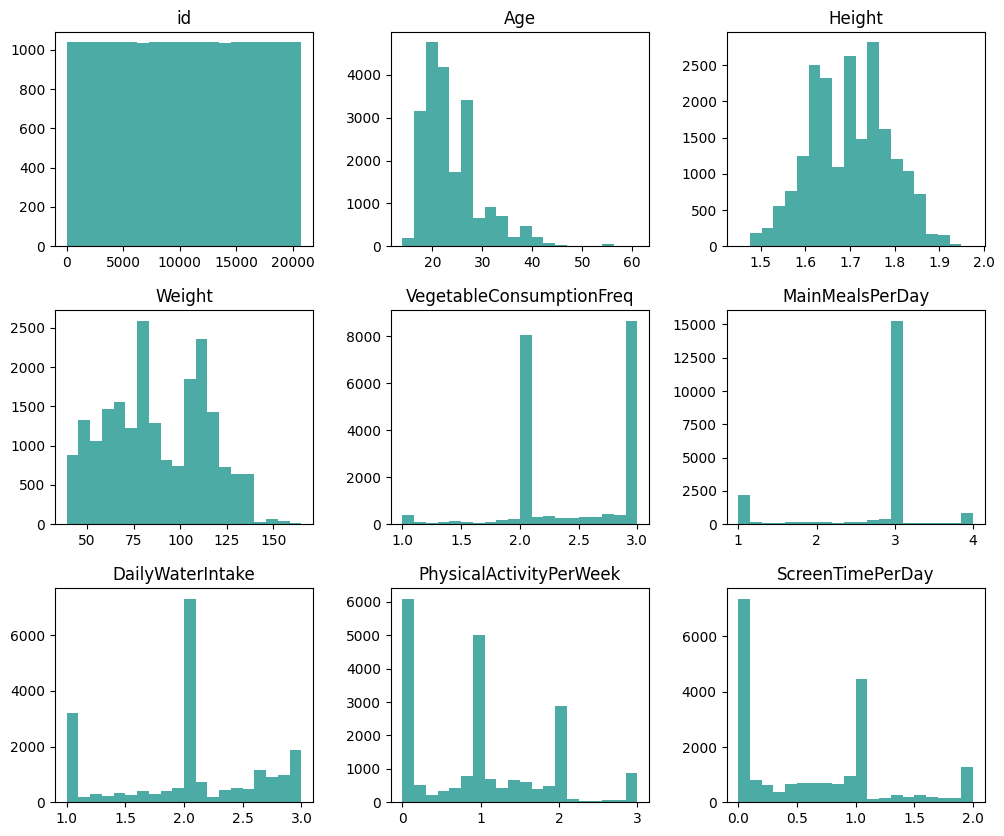

In [24]:
numerical.hist(figsize=(12, 10), bins=20, color='#4caba4', grid=False)

In [25]:
def showplot(columnname):
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['axes.facecolor'] = 'white'
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax = ax.flatten()
    value_counts = categorical[columnname].value_counts()
    labels = value_counts.index.tolist()
    colors =["#4caba4", "#d68c78",'#a3a2a2','#ab90a0', '#e6daa3', '#6782a8', '#8ea677']
    
    # Donut Chart
    wedges, texts, autotexts = ax[0].pie(
        value_counts, autopct='%1.1f%%',textprops={'size': 9, 'color': 'white','fontweight':'bold' }, colors=colors,
        wedgeprops=dict(width=0.35),  startangle=80,   pctdistance=0.85  )
    # circle
    centre_circle = plt.Circle((0, 0), 0.6, fc='white')
    ax[0].add_artist(centre_circle)
    
    # Count Plot
    sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)
    for i, v in enumerate(value_counts):
        ax[1].text(v + 1, i, str(v), color='black',fontsize=10, va='center')
    sns.despine(left=True, bottom=True)
    plt.yticks(fontsize=9,color='black')
    ax[1].set_ylabel(None)
    plt.xlabel("")
    plt.xticks([])
    fig.suptitle(columnname, fontsize=15, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

Plotting: Gender


C:\Users\dell\AppData\Local\Temp\ipykernel_11444\3083329249.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\dell\AppData\Local\Temp\ipykernel_11444\3083329249.py:19: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)


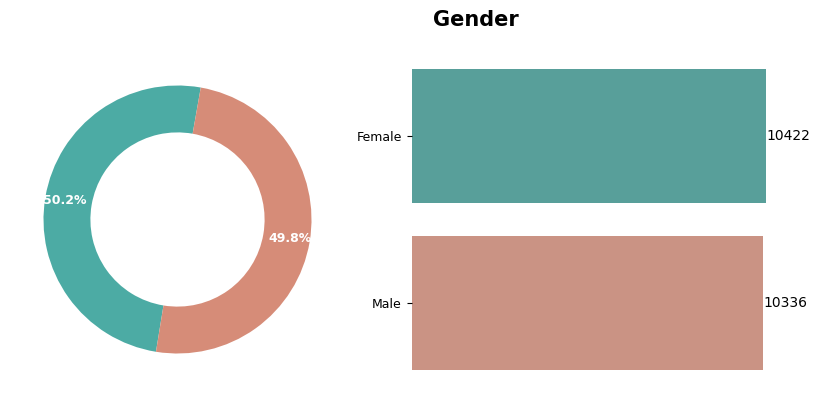

Plotting: family_history_with_overweight


C:\Users\dell\AppData\Local\Temp\ipykernel_11444\3083329249.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\dell\AppData\Local\Temp\ipykernel_11444\3083329249.py:19: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)


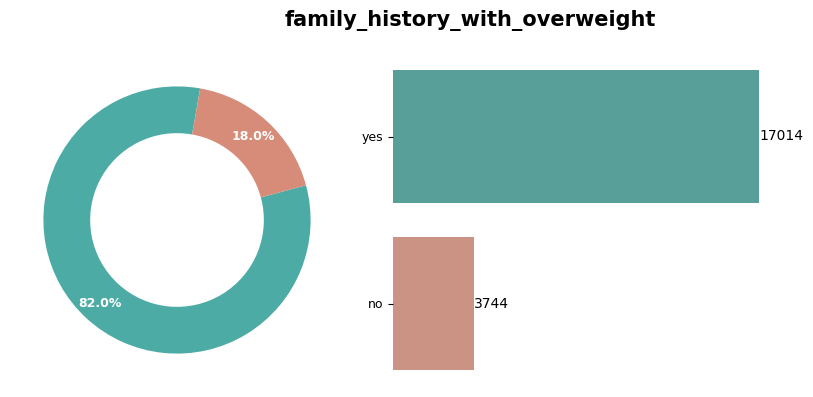

Plotting: HighCalorieFoodFreq


C:\Users\dell\AppData\Local\Temp\ipykernel_11444\3083329249.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\dell\AppData\Local\Temp\ipykernel_11444\3083329249.py:19: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)


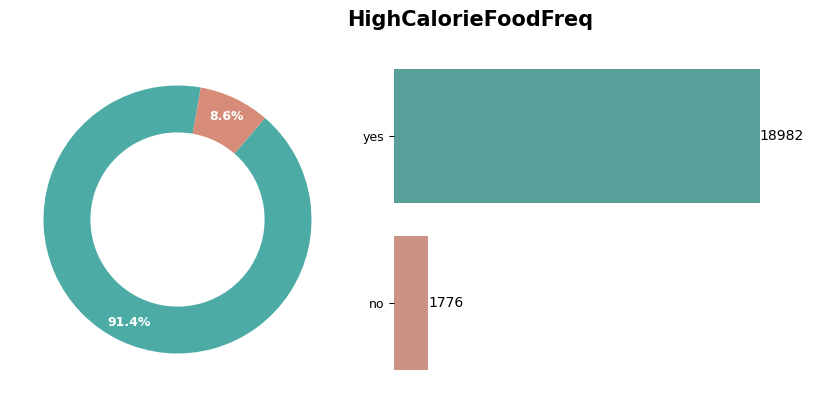

Plotting: SnackingFrequency


C:\Users\dell\AppData\Local\Temp\ipykernel_11444\3083329249.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\dell\AppData\Local\Temp\ipykernel_11444\3083329249.py:19: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)


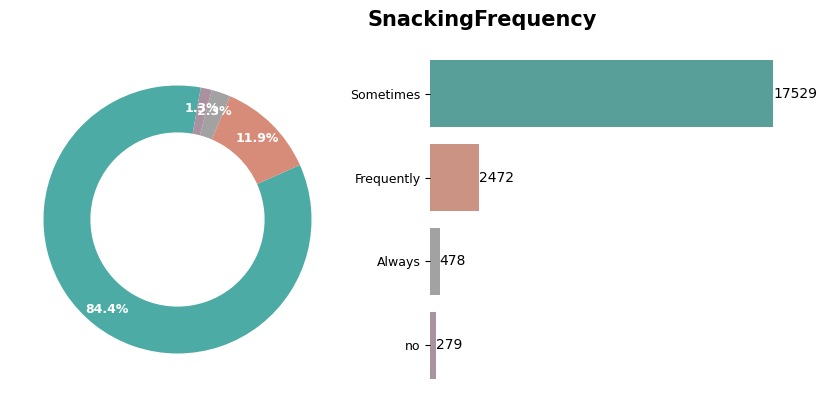

Plotting: SmokingHabit


C:\Users\dell\AppData\Local\Temp\ipykernel_11444\3083329249.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\dell\AppData\Local\Temp\ipykernel_11444\3083329249.py:19: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)


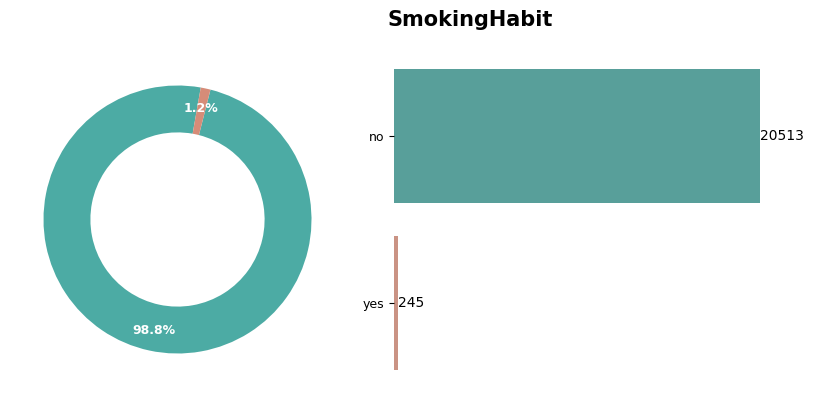

Plotting: CaloricMonitoring


C:\Users\dell\AppData\Local\Temp\ipykernel_11444\3083329249.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\dell\AppData\Local\Temp\ipykernel_11444\3083329249.py:19: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)


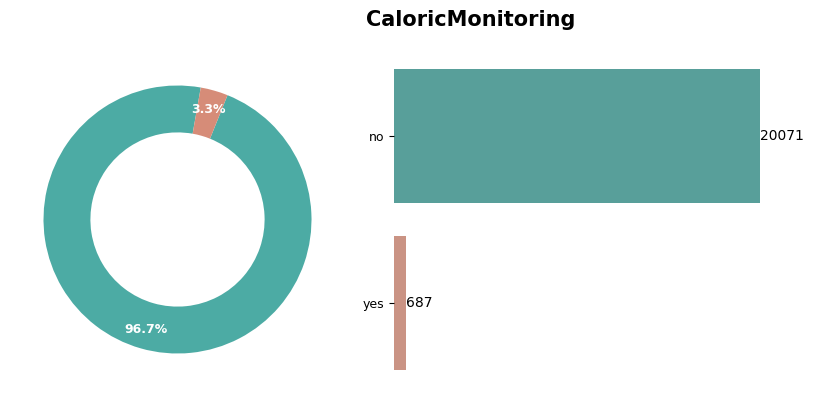

Plotting: AlcoholConsumption


C:\Users\dell\AppData\Local\Temp\ipykernel_11444\3083329249.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\dell\AppData\Local\Temp\ipykernel_11444\3083329249.py:19: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)


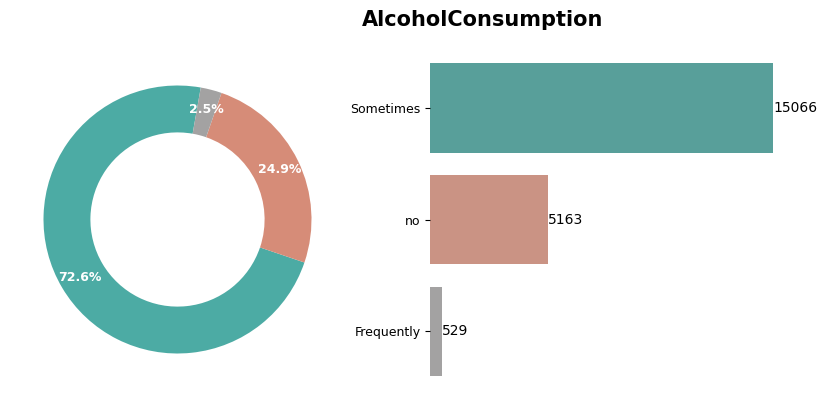

Plotting: ModeOfTransportation


C:\Users\dell\AppData\Local\Temp\ipykernel_11444\3083329249.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\dell\AppData\Local\Temp\ipykernel_11444\3083329249.py:19: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)


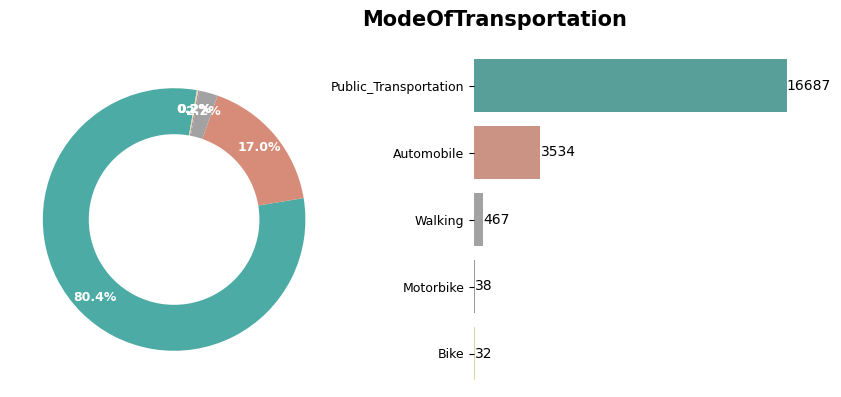

Plotting: NObeyesdad


C:\Users\dell\AppData\Local\Temp\ipykernel_11444\3083329249.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)


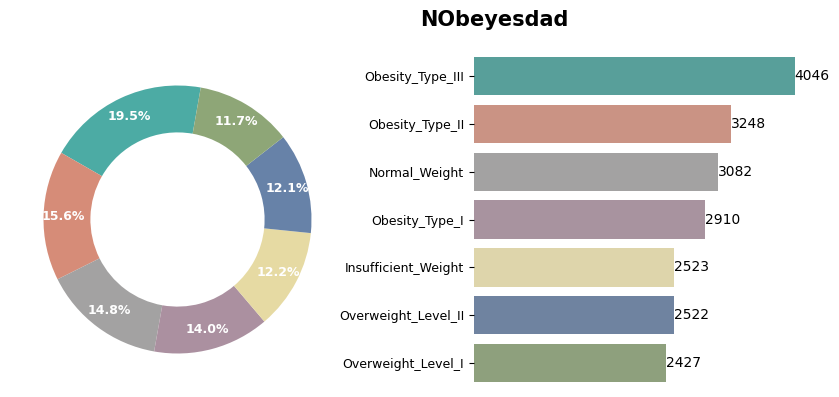

In [26]:
for column in categorical.columns:
    print(f"Plotting: {column}")
    try:
        showplot(column)
    except Exception as e:
        print(f"Error plotting {column}: {e}")

#### BI

In [27]:
data.groupby(['NObeyesdad',"family_history_with_overweight"]).size().reset_index(name='count')

NObeyesdad family_history_with_overweight  count
0   Insufficient_Weight                             no   1449
1   Insufficient_Weight                            yes   1074
2         Normal_Weight                             no   1292
3         Normal_Weight                            yes   1790
4        Obesity_Type_I                             no     48
5        Obesity_Type_I                            yes   2862
6       Obesity_Type_II                             no      5
7       Obesity_Type_II                            yes   3243
8      Obesity_Type_III                             no      1
9      Obesity_Type_III                            yes   4045
10   Overweight_Level_I                             no    756
11   Overweight_Level_I                            yes   1671
12  Overweight_Level_II                             no    193
13  Overweight_Level_II                            yes   2329

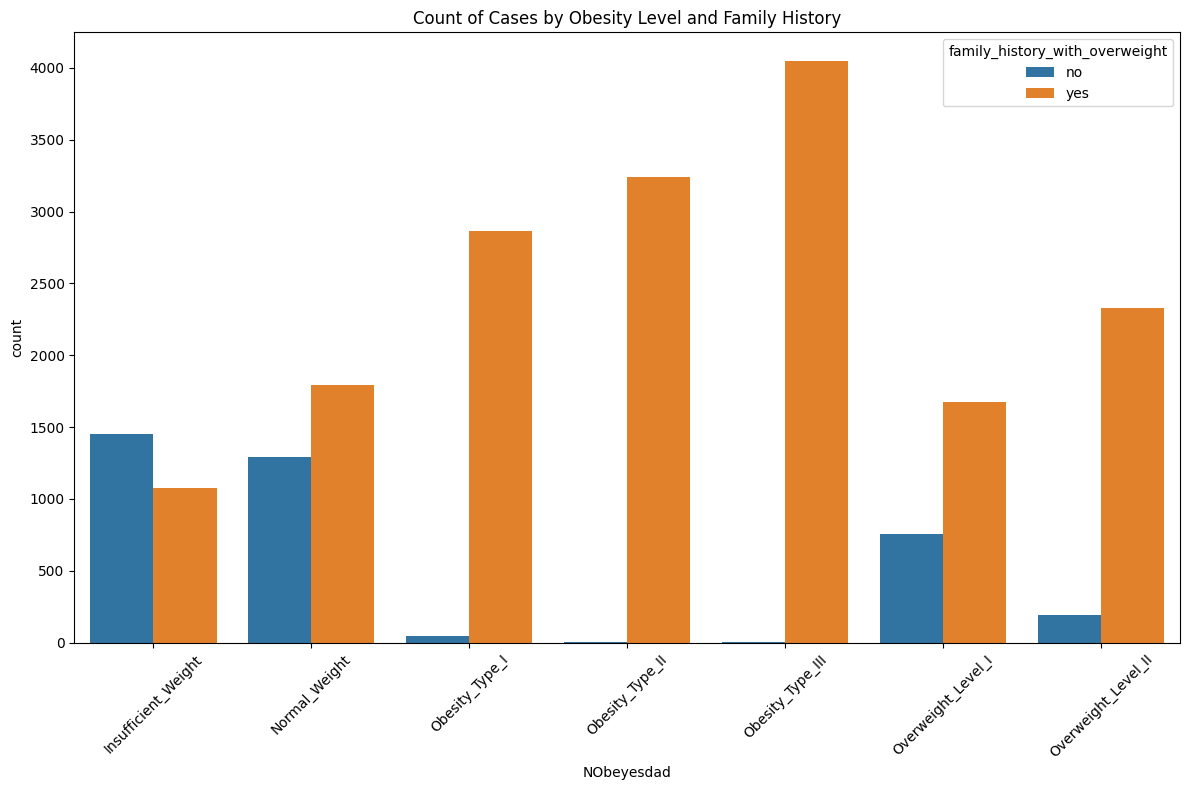

In [28]:
# Get counts of each group
count_data = data.groupby(['NObeyesdad', 'family_history_with_overweight']).size().reset_index(name='count')

# Create bar chart of counts
plt.figure(figsize=(12, 8))
sns.barplot(x='NObeyesdad', y='count', hue='family_history_with_overweight', data=count_data)
plt.title('Count of Cases by Obesity Level and Family History')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ممكن تكون حاجه وراثيه بنسبه كبيؤه

In [29]:
grouped_data=data.groupby(['NObeyesdad',"SnackingFrequency"]).size().reset_index(name='count')

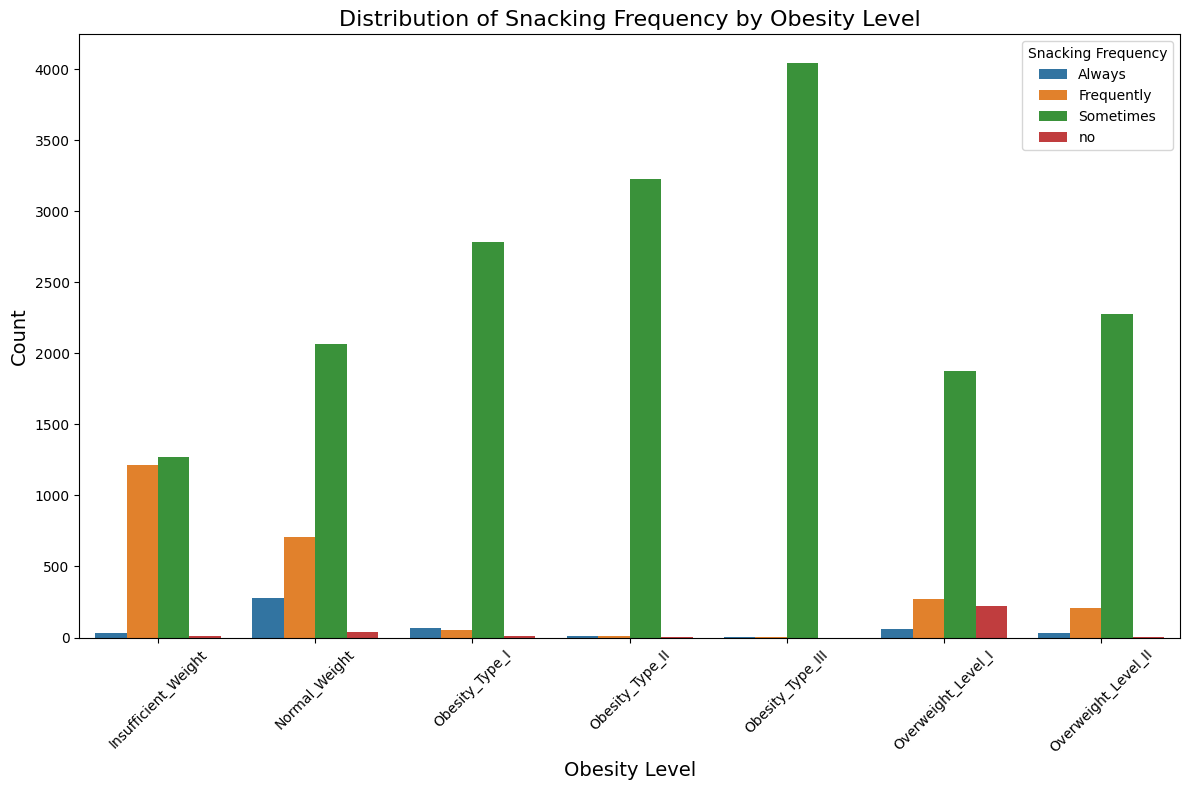

In [30]:
# Store the grouped data
grouped_data = data.groupby(['NObeyesdad', 'SnackingFrequency']).size().reset_index(name='count')

# Create a grouped bar chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='NObeyesdad', y='count', hue='SnackingFrequency', data=grouped_data)
plt.title('Distribution of Snacking Frequency by Obesity Level', fontsize=16)
plt.xlabel('Obesity Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Snacking Frequency')
plt.tight_layout()
plt.show()

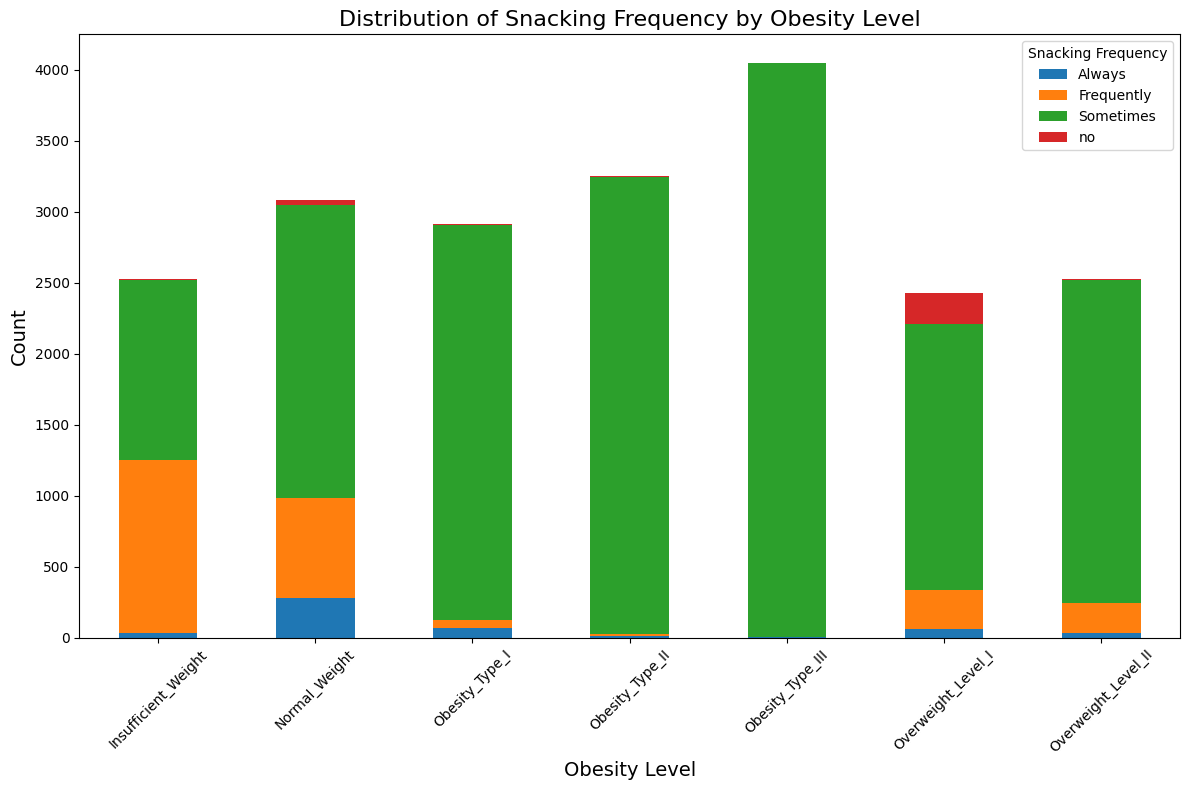

In [31]:
# Create a pivot table for plotting
pivot_data = grouped_data.pivot(index='NObeyesdad', columns='SnackingFrequency', values='count')

# Create a stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Snacking Frequency by Obesity Level', fontsize=16)
plt.xlabel('Obesity Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Snacking Frequency')
plt.tight_layout()
plt.show()

مش بتاثر لان كله يعتبر sometimes

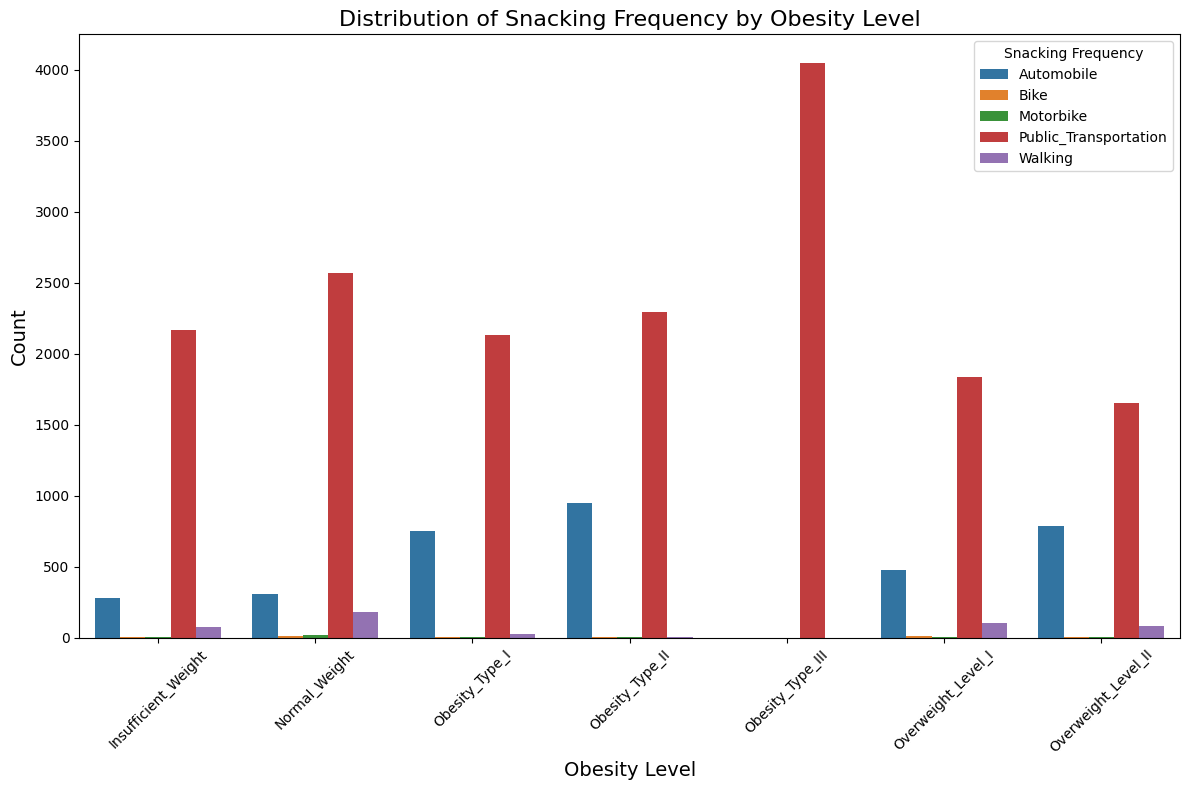

In [32]:
# Store the grouped data
grouped_data = data.groupby(['NObeyesdad', 'ModeOfTransportation']).size().reset_index(name='count')



plt.figure(figsize=(12, 8))
sns.barplot(x='NObeyesdad', y='count', hue='ModeOfTransportation', data=grouped_data)
plt.title('Distribution of Snacking Frequency by Obesity Level', fontsize=16)
plt.xlabel('Obesity Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Snacking Frequency')
plt.tight_layout()
plt.show()

In [33]:
grouped_alcohol = data.groupby(['NObeyesdad', 'AlcoholConsumption']).size().reset_index(name='count')

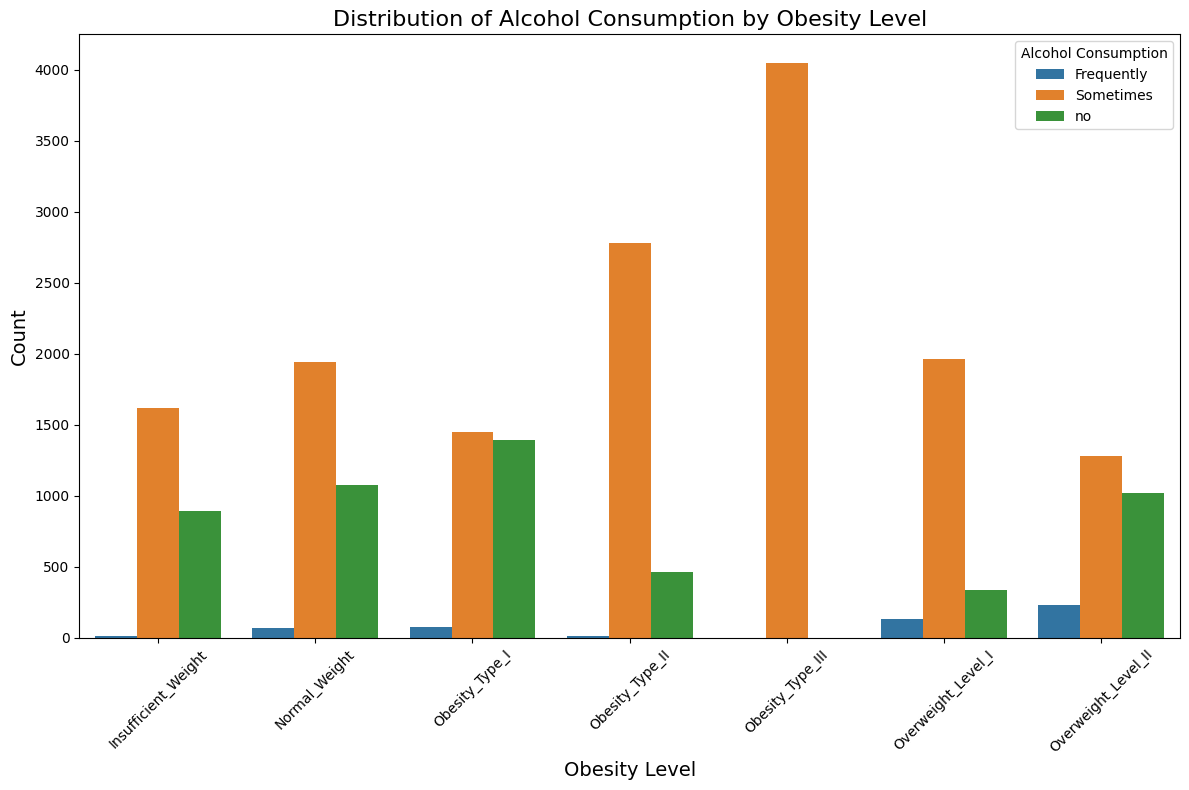

In [34]:
plt.figure(figsize=(12, 8))
sns.barplot(x='NObeyesdad', y='count', hue='AlcoholConsumption', data=grouped_alcohol)
plt.title('Distribution of Alcohol Consumption by Obesity Level', fontsize=16)
plt.xlabel('Obesity Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Alcohol Consumption')
plt.tight_layout()
plt.show()

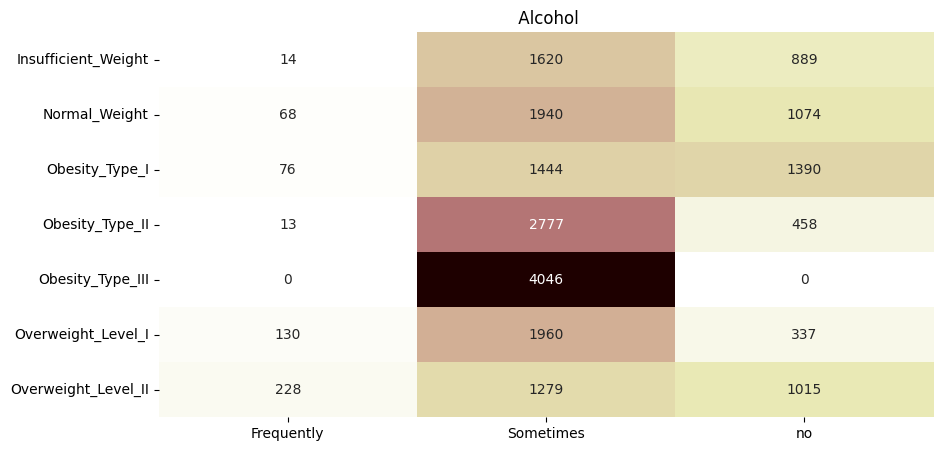

In [35]:
cross_tab = pd.crosstab(data['NObeyesdad'], data['AlcoholConsumption'])
plt.figure(figsize=(10, 5))
sns.heatmap(cross_tab, annot=True, cmap='pink_r', fmt='d', cbar=False)
plt.title(' Alcohol')
plt.xlabel('')
plt.ylabel('')
plt.show()

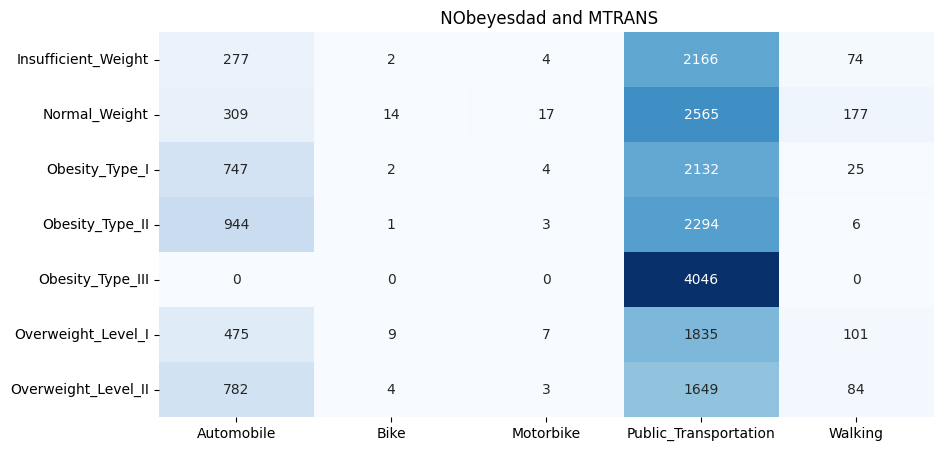

In [36]:
cross_tab = pd.crosstab(data['NObeyesdad'], data['ModeOfTransportation'])
plt.figure(figsize=(10, 5))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title(' NObeyesdad and MTRANS')
plt.xlabel('')
plt.ylabel('')
plt.show()

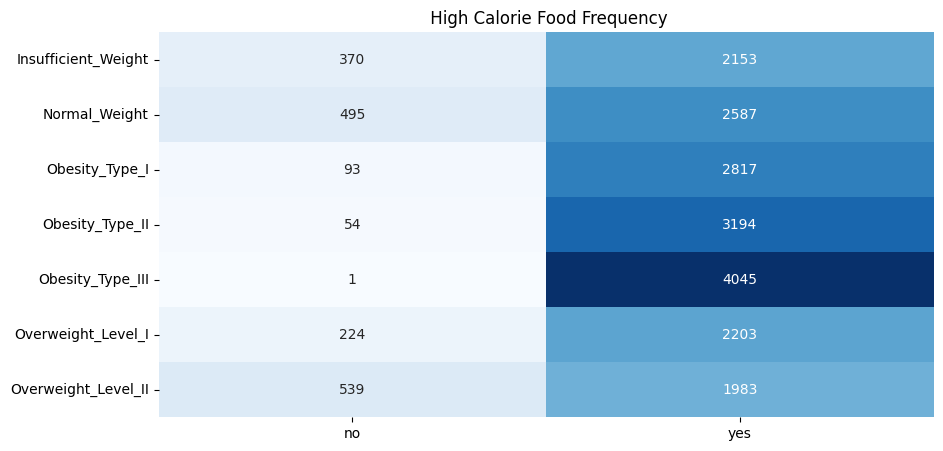

In [37]:
cross_tab = pd.crosstab(data['NObeyesdad'], data['HighCalorieFoodFreq'])
plt.figure(figsize=(10, 5))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title(' High Calorie Food Frequency')
plt.xlabel('')
plt.ylabel('')
plt.show()

ليها تاثير كبير فعلا بدليل ان اكتر ناس الاستهلاك بتاعهم عالي

In [38]:
colors = ['#1f77b4', '#fc6c44', '#2b8a2b', '#fc7c7c', '#9467bd', '#4ba4ad', '#c7ad18', '#7f7f7f', '#69d108']

C:\Users\dell\AppData\Local\Temp\ipykernel_11444\1059314933.py:2: UserWarning: The palette list has more values (9) than needed (7), which may not be intended.
  ax = sns.countplot(x='Gender', hue='NObeyesdad', data=data, palette=colors, dodge=True)


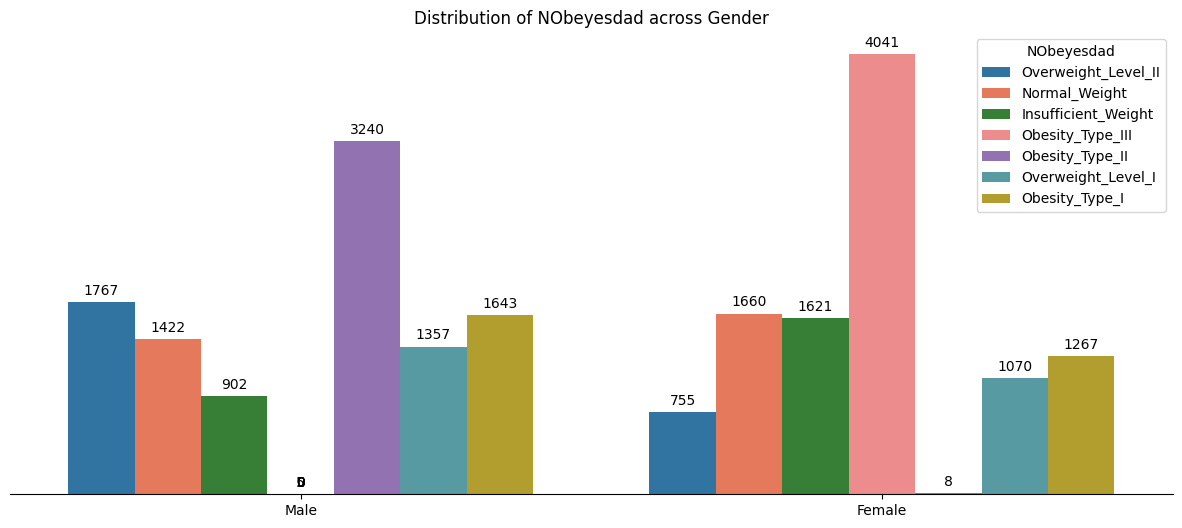

In [39]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='Gender', hue='NObeyesdad', data=data, palette=colors, dodge=True)
plt.title('Distribution of NObeyesdad across Gender')
sns.despine(left=True, bottom=False)
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 8), textcoords='offset points')
plt.show()

الستات اغلبهم تايب3 والرجاله اغلبهم تايب 2

In [40]:
data.groupby(['NObeyesdad']).sum().sort_values("VegetableConsumptionFreq" , ascending= False)[["VegetableConsumptionFreq"]]

VegetableConsumptionFreq
NObeyesdad                                   
Obesity_Type_III                 12138.000000
Obesity_Type_II                   7877.136639
Normal_Weight                     7311.271293
Insufficient_Weight               6256.423581
Obesity_Type_I                    6102.422115
Overweight_Level_II               5610.185975
Overweight_Level_I                5476.726813

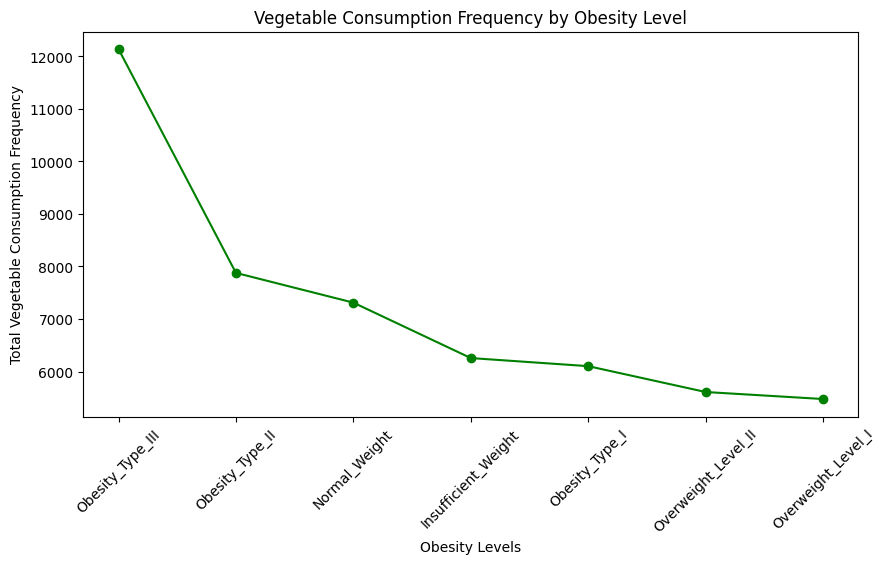

In [41]:
import matplotlib.pyplot as plt

grouped_data = data.groupby('NObeyesdad').sum().sort_values("VegetableConsumptionFreq", ascending=False)

vcf_values = grouped_data["VegetableConsumptionFreq"]

plt.figure(figsize=(10, 5))  
plt.plot(vcf_values.index, vcf_values.values, marker='o', linestyle='-', color='green')

plt.xlabel("Obesity Levels")
plt.ylabel("Total Vegetable Consumption Frequency")
plt.title("Vegetable Consumption Frequency by Obesity Level")
plt.xticks(rotation=45)  

plt.show()


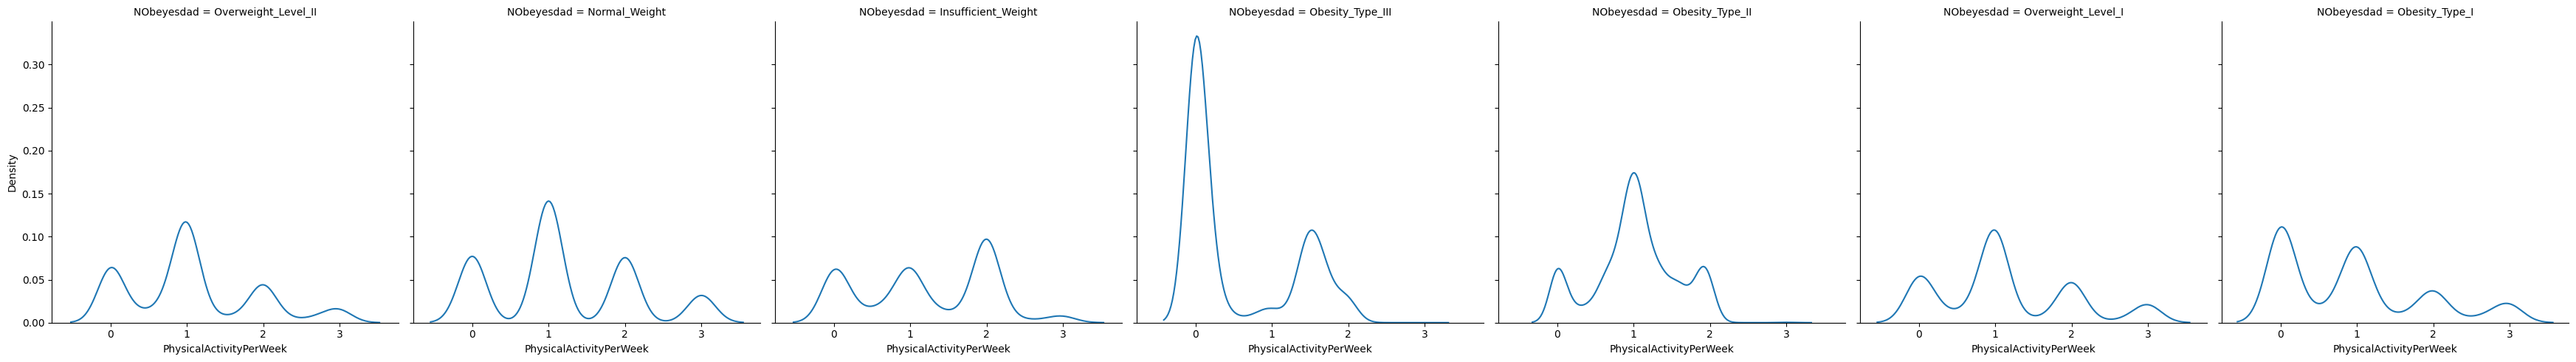

In [42]:
sns.displot(data=data, x="PhysicalActivityPerWeek", col="NObeyesdad" , kind = "kde")

<Figure size 1500x1000 with 0 Axes>

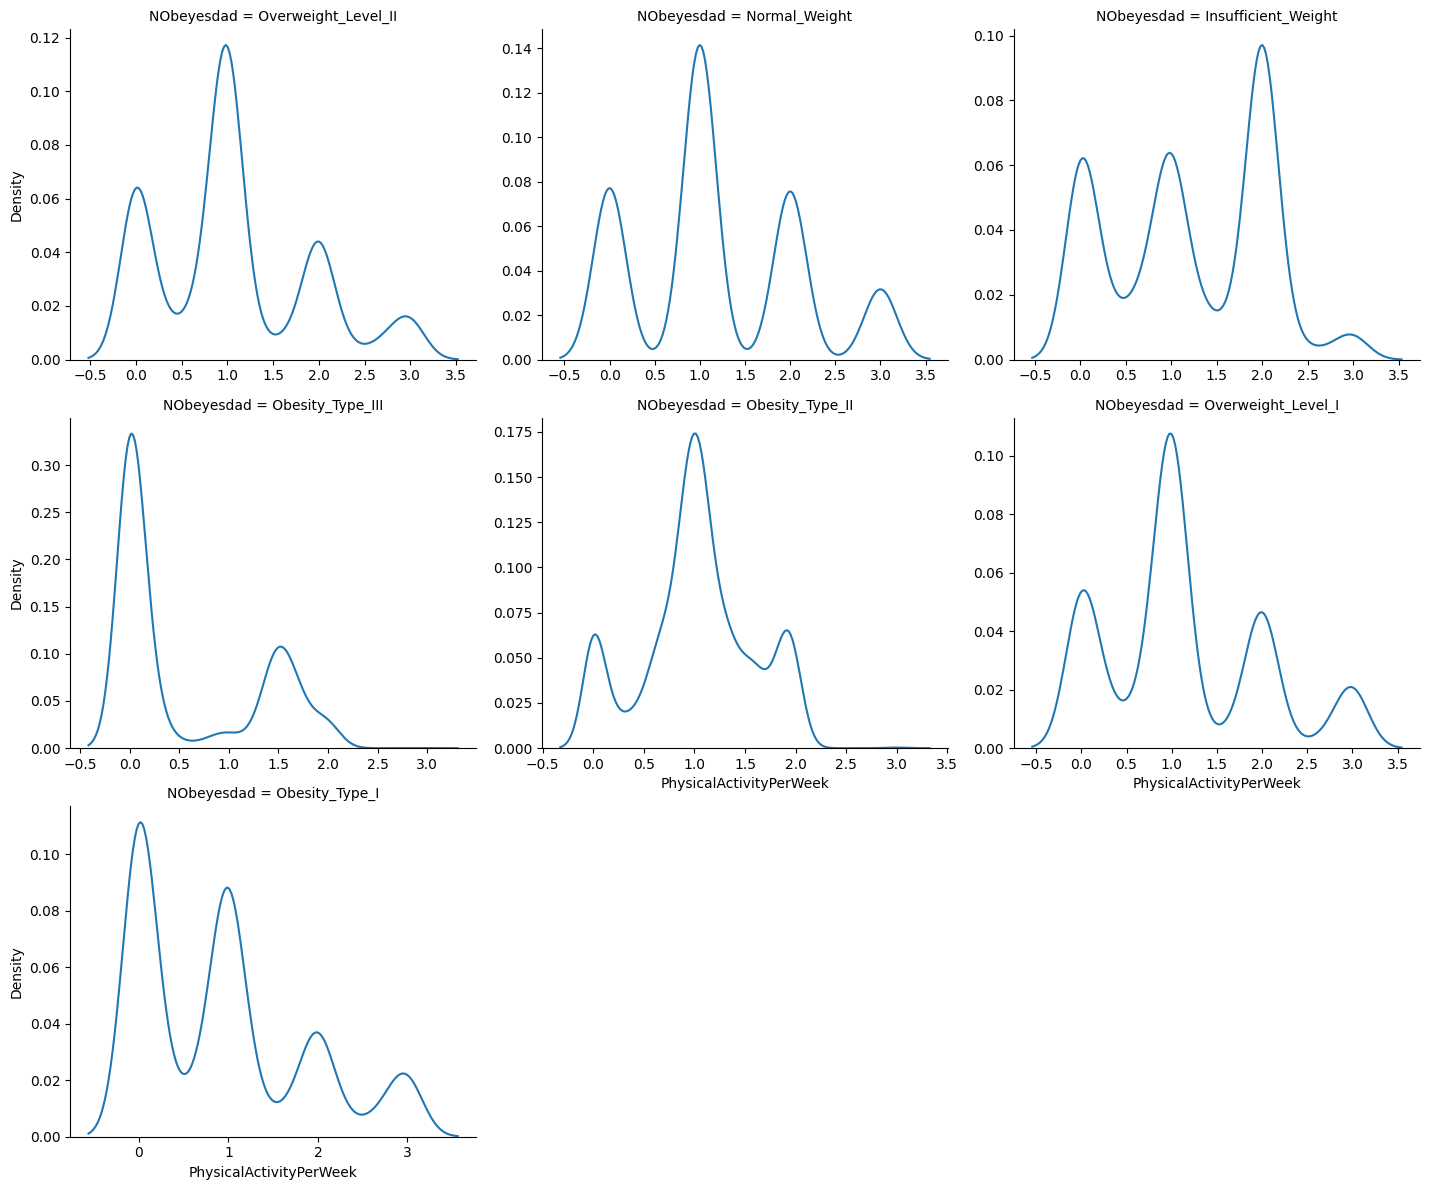

In [43]:
plt.figure(figsize=(15, 10))  # Create a larger figure first
sns.displot(data=data, x="PhysicalActivityPerWeek", col="NObeyesdad", kind="kde", 
            height=4, aspect=1.2, col_wrap=3, facet_kws={'sharex': False, 'sharey': False})
plt.tight_layout()
plt.show()

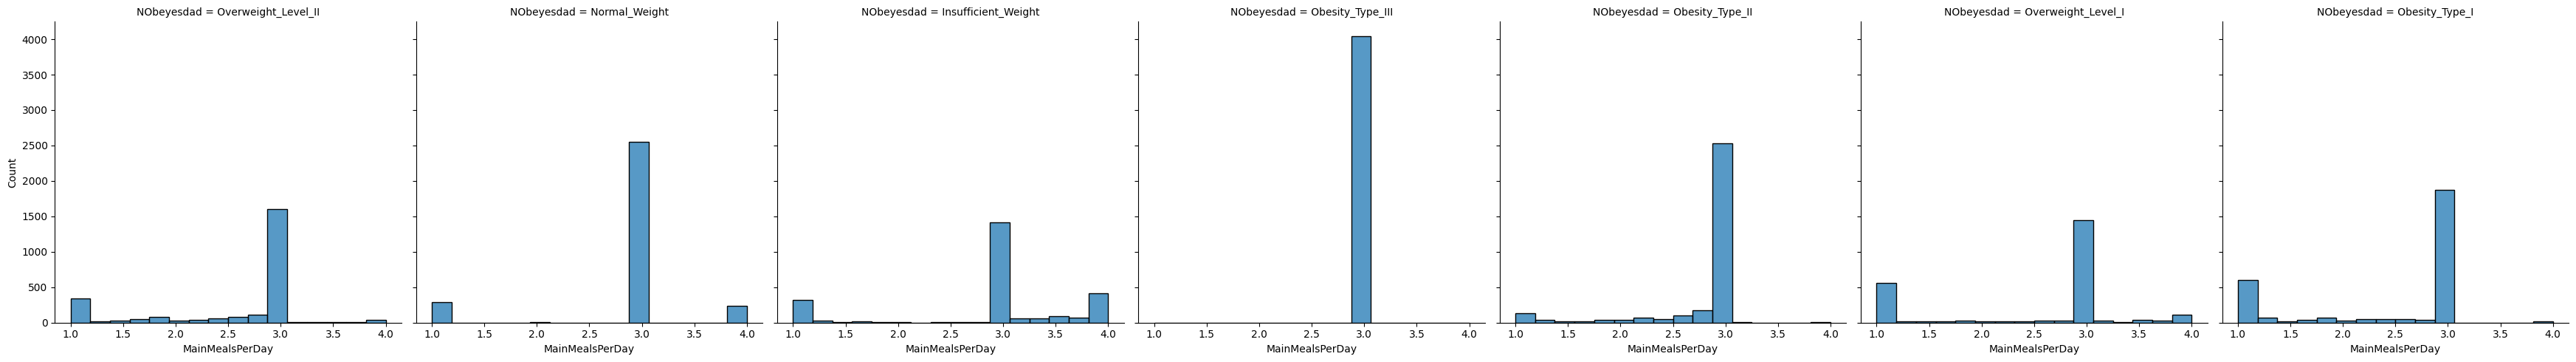

In [44]:
sns.displot(data=data, x="MainMealsPerDay", col="NObeyesdad" )

محستش انه بياثؤ كلهم بياكلوا 3 وحبات

### Multi

<Axes: >

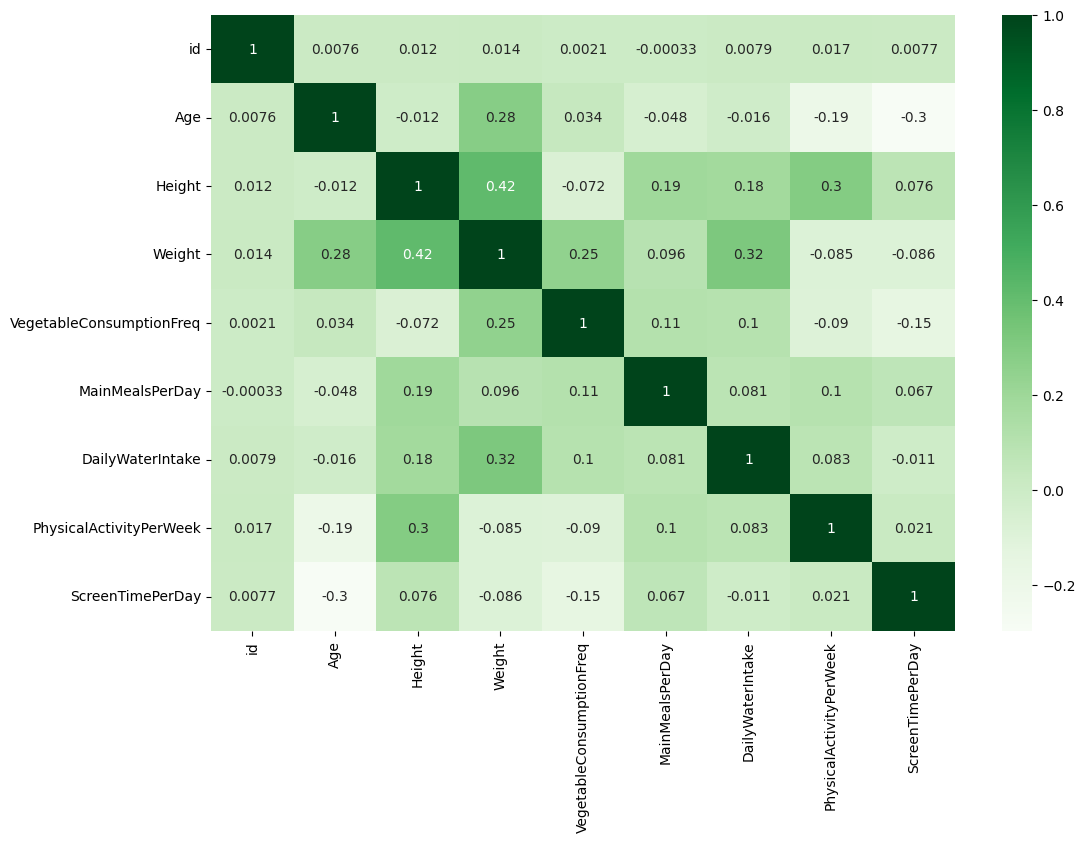

In [45]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.select_dtypes(include=['int64', 'float64']).corr(),annot = True , cmap = "Greens")

In [46]:
data.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'HighCalorieFoodFreq',
       'VegetableConsumptionFreq', 'MainMealsPerDay', 'SnackingFrequency',
       'SmokingHabit', 'DailyWaterIntake', 'CaloricMonitoring',
       'PhysicalActivityPerWeek', 'ScreenTimePerDay', 'AlcoholConsumption',
       'ModeOfTransportation', 'NObeyesdad'],
      dtype='object')

### transportation & physical activity

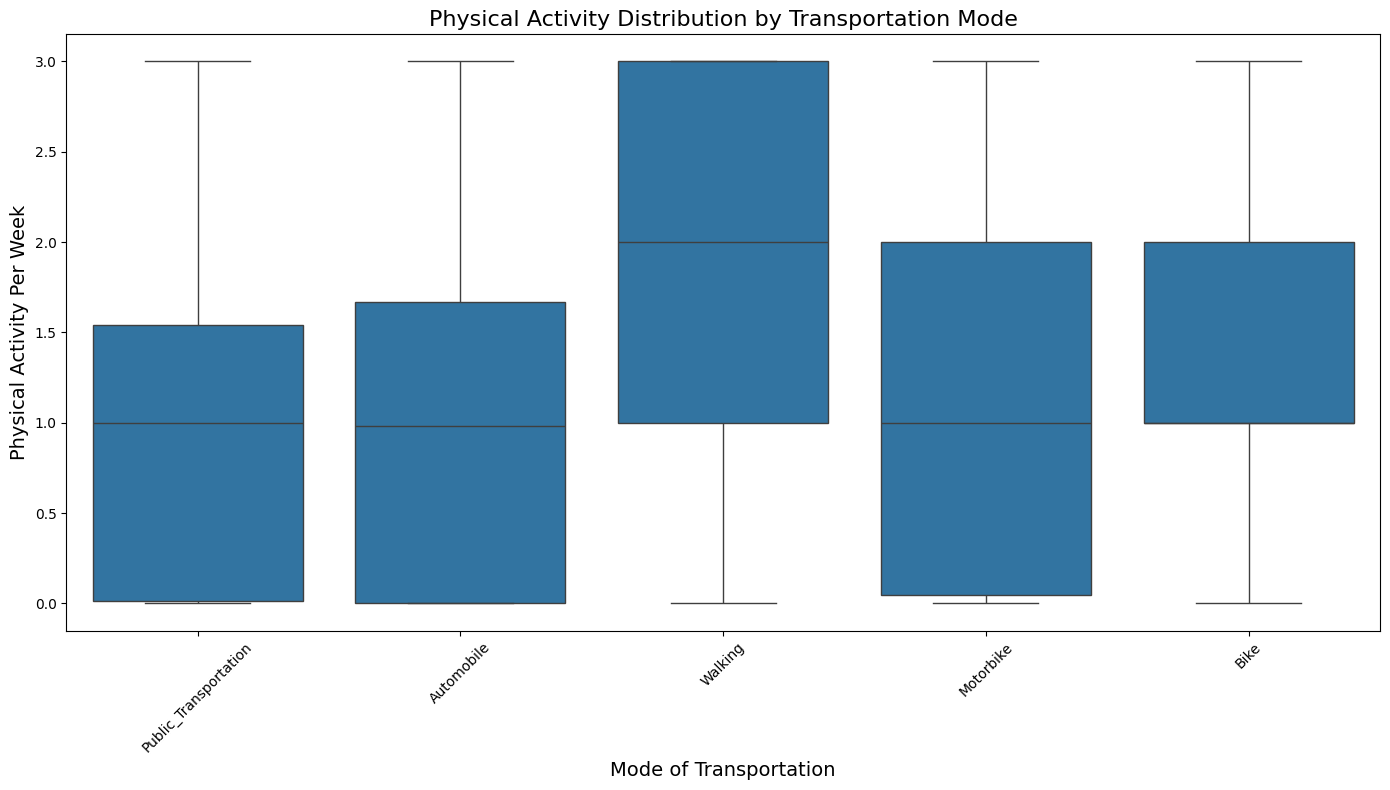

In [47]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='ModeOfTransportation', y='PhysicalActivityPerWeek')
plt.title('Physical Activity Distribution by Transportation Mode', fontsize=16)
plt.xlabel('Mode of Transportation', fontsize=14)
plt.ylabel('Physical Activity Per Week', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Age,transportation & physical activity

In [48]:
import plotly.express as px

fig = px.scatter(data, x="Age", y="ModeOfTransportation", color="PhysicalActivityPerWeek",
                 title="Age vs Physical Activity Per Week",
                 labels={"Age": "Age", "PhysicalActivityPerWeek": "Physical Activity (Per Week)"},
                 )  # Optional: Show mode of transportation on hover
fig.show()


### getsnack & CaloricMonitering

In [49]:
fig = px.box(data, x="CaloricMonitoring", y="SnackingFrequency",
             title="Snacking Frequency by Caloric Monitoring",
             labels={"CaloricMonitoring": "Caloric Monitoring", "SnackingFrequency": "Snacking Frequency"})
fig.show()


### PhysicalActivity & CaloricMonitoring

In [50]:
import plotly.express as px

fig = px.box(data, x="CaloricMonitoring", y="PhysicalActivityPerWeek", 
                 title="Caloric Monitoring vs Physical Activity Per Week",
                 labels={"CaloricMonitoring": "Caloric Monitoring", "PhysicalActivityPerWeek": "Physical Activity (Per Week)"},
                 hover_data=["Age", "ModeOfTransportation"])  # Optional extra details
fig.show()


### DailyWaterIntake  & VegetableConsumptionFreq

In [51]:
import plotly.express as px

fig = px.scatter(data, x="VegetableConsumptionFreq", y="DailyWaterIntake",color="HighCalorieFoodFreq",
                 title="Vegetable Consumption vs High Calorie Food Consumption",
                 labels={"VegetableConsumptionFreq": "Vegetable Consumption Frequency",
                         "HighCalorieFoodFreq": "High Calorie Food Frequency"},
                 )  # Add extra details on hover
fig.show()


### Vegetable Consumption, Caloric Monitoring & Main Meals

In [52]:

import plotly.express as px

fig = px.scatter(data, x="VegetableConsumptionFreq", y="MainMealsPerDay", color="CaloricMonitoring",
                    title="3D Relationship: Vegetable Consumption, Caloric Monitoring & Main Meals",
                    labels={"VegetableConsumptionFreq": "Vegetable Consumption",
                            "MainMealsPerDay": "Main Meals Per Day",
                            "CaloricMonitoring": "Caloric Monitoring"})
fig.show()


### Weight Distribution Based on Number of Meals Per Day

In [53]:
fig = px.scatter(data, x="MainMealsPerDay", y="Weight", 
                title="Weight Distribution Based on Number of Meals Per Day",
                labels={"MainMealsPerDay": "Main Meals Per Day", "Weight": "Weight (kg)"})
fig.show()


In [54]:
data.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
HighCalorieFoodFreq               0
VegetableConsumptionFreq          0
MainMealsPerDay                   0
SnackingFrequency                 0
SmokingHabit                      0
DailyWaterIntake                  0
CaloricMonitoring                 0
PhysicalActivityPerWeek           0
ScreenTimePerDay                  0
AlcoholConsumption                0
ModeOfTransportation              0
NObeyesdad                        0
dtype: int64

In [55]:
X=data.drop("NObeyesdad",axis=1)
y=data["NObeyesdad"]

In [56]:
x_train,x_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=123)

In [57]:
x_train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
HighCalorieFoodFreq               0
VegetableConsumptionFreq          0
MainMealsPerDay                   0
SnackingFrequency                 0
SmokingHabit                      0
DailyWaterIntake                  0
CaloricMonitoring                 0
PhysicalActivityPerWeek           0
ScreenTimePerDay                  0
AlcoholConsumption                0
ModeOfTransportation              0
dtype: int64

#### Preparation

In [58]:
data.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'HighCalorieFoodFreq',
       'VegetableConsumptionFreq', 'MainMealsPerDay', 'SnackingFrequency',
       'SmokingHabit', 'DailyWaterIntake', 'CaloricMonitoring',
       'PhysicalActivityPerWeek', 'ScreenTimePerDay', 'AlcoholConsumption',
       'ModeOfTransportation', 'NObeyesdad'],
      dtype='object')

In [59]:
x_train.drop(columns=["id","SmokingHabit"],inplace=True)
x_valid.drop(columns=["id","SmokingHabit"],inplace=True)

In [60]:
data_vif = data.select_dtypes(include=[np.number])


vif_data = pd.DataFrame()
vif_data["Feature"] = data_vif.columns
vif_data["VIF"] = [variance_inflation_factor(data_vif.values, i) for i in range(data_vif.shape[1])]

# Sort by VIF in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)

                    Feature        VIF
2                    Height  75.103311
4  VegetableConsumptionFreq  22.252531
1                       Age  21.488351
5           MainMealsPerDay  17.411882
3                    Weight  16.335162
6          DailyWaterIntake  13.719299
0                        id   3.984522
7   PhysicalActivityPerWeek   2.700994
8          ScreenTimePerDay   2.320133


In [61]:
categorical.columns

Index(['Gender', 'family_history_with_overweight', 'HighCalorieFoodFreq',
       'SnackingFrequency', 'SmokingHabit', 'CaloricMonitoring',
       'AlcoholConsumption', 'ModeOfTransportation', 'NObeyesdad'],
      dtype='object')

In [62]:
nominal_cols = ["Gender", "family_history_with_overweight", "CaloricMonitoring", "ModeOfTransportation","HighCalorieFoodFreq"]
ordinal_cols = ["SnackingFrequency", "AlcoholConsumption"]

In [63]:
encoder = OrdinalEncoder()
x_train[ordinal_cols] = encoder.fit_transform(x_train[ordinal_cols])
x_valid[ordinal_cols] = encoder.transform(x_valid[ordinal_cols])

In [64]:
HotEncoder = OneHotEncoder(sparse_output=False,drop="first")

In [65]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Ordinal Encoding
ordinal_encoder = OrdinalEncoder()
x_train[ordinal_cols] = ordinal_encoder.fit_transform(x_train[ordinal_cols])
x_valid[ordinal_cols] = ordinal_encoder.transform(x_valid[ordinal_cols])

# One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
x_train_onehot = onehot_encoder.fit_transform(x_train[nominal_cols])
onehot_columns = onehot_encoder.get_feature_names_out(nominal_cols)
onehot_df = pd.DataFrame(x_train_onehot, columns=onehot_columns, index=x_train.index)

# Prepare final training dataset
x_train = x_train.drop(columns=nominal_cols)
x_train = pd.concat([x_train, onehot_df], axis=1)

In [66]:
x_train

Age    Height      Weight  VegetableConsumptionFreq  \
4732   19.314429  1.739991  133.800129                  3.000000   
15643  22.000000  1.650000   70.000000                  2.000000   
8669   21.289104  1.738717  127.161381                  3.000000   
8273   18.907514  1.710129   50.248677                  2.652779   
4886   23.000000  1.850000   85.000000                  2.000000   
...          ...       ...         ...                       ...   
7763   18.000000  1.600000   66.000000                  3.000000   
15377  18.000000  1.670000   70.000000                  3.000000   
17730  26.000000  1.611462  111.939671                  3.000000   
15725  31.630054  1.835381  128.828122                  2.880759   
19966  33.070142  1.676346   83.014033                  2.000000   

       MainMealsPerDay  SnackingFrequency  DailyWaterIntake  \
4732          3.000000                2.0          2.387250   
15643         1.000000                2.0          1.000000   
8669          3.000000                2.0          1.693362   
8273          3.000000                1.0          1.000000   
4886          4.000000                1.0          3.000000   
...                ...                ...               ...   
7763          3.000000                2.0          2.000000   
15377         3.000000                1.0          2.000000   
17730         3.000000                2.0          2.609188   
15725         3.000000                2.0          2.471033   
19966         2.973504                2.0          2.042078   

       PhysicalActivityPerWeek  ScreenTimePerDay  AlcoholConsumption  \
4732                  1.931173          0.886135                 1.0   
15643                 1.000000          0.000000                 2.0   
8669                  1.946907          0.946888                 1.0   
8273                  0.215187          1.195929                 1.0   
4886                  2.000000          0.000000                 1.0   
...                        ...               ...                 ...   
7763                  2.000000          1.000000                 1.0   
15377                 1.000000          0.000000                 1.0   
17730                 0.007050          0.228598                 1.0   
15725                 0.170480          0.000000                 1.0   
19966                 0.371452          1.978043                 1.0   

       Gender_Male  family_history_with_overweight_yes  CaloricMonitoring_yes  \
4732           0.0                                 1.0                    0.0   
15643          0.0                                 0.0                    0.0   
8669           0.0                                 1.0                    0.0   
8273           0.0                                 1.0                    0.0   
4886           1.0                                 1.0                    0.0   
...            ...                                 ...                    ...   
7763           0.0                                 1.0                    0.0   
15377          1.0                                 0.0                    0.0   
17730          0.0                                 1.0                    0.0   
15725          1.0                                 1.0                    0.0   
19966          1.0                                 1.0                    0.0   

       ModeOfTransportation_Bike  ModeOfTransportation_Motorbike  \
4732                         0.0                             0.0   
15643                        0.0                             0.0   
8669                         0.0                             0.0   
8273                         0.0                             0.0   
4886                         0.0                             0.0   
...                          ...                             ...   
7763                         0.0                             0.0   
15377                        0.0                         

In [67]:
x_valid_onehot = onehot_encoder.transform(x_valid[nominal_cols])
valid_onehot_df = pd.DataFrame(x_valid_onehot, columns=onehot_columns, index=x_valid.index)

# Prepare final validation dataset
x_valid = x_valid.drop(columns=nominal_cols)
x_valid = pd.concat([x_valid, valid_onehot_df], axis=1)

In [68]:
x_valid

Age    Height      Weight  VegetableConsumptionFreq  \
15697  21.414477  1.713348   82.414477                  1.873716   
6657   37.000000  1.500000   76.000000                  2.000000   
19713  17.000000  1.700000   85.000000                  2.000000   
12104  23.000000  1.624099   82.412665                  3.000000   
1397   21.000000  1.800000   72.000000                  3.000000   
...          ...       ...         ...                       ...   
13052  26.000000  1.668709  104.772164                  3.000000   
18433  26.000000  1.681080  110.084946                  3.000000   
1786   21.000000  1.750000   80.000000                  2.000000   
12192  17.000000  1.800000   60.000000                  3.000000   
8297   21.000000  1.620000   70.000000                  2.000000   

       MainMealsPerDay  SnackingFrequency  DailyWaterIntake  \
15697           3.0000                2.0          2.000000   
6657            3.0000                2.0          1.000000   
19713           2.6648                2.0          1.000000   
12104           3.0000                2.0          2.606690   
1397            3.0000                1.0          2.000000   
...                ...                ...               ...   
13052           3.0000                2.0          1.526416   
18433           3.0000                2.0          2.704850   
1786            1.0000                2.0          2.000000   
12192           4.0000                2.0          2.000000   
8297            3.0000                2.0          2.000000   

       PhysicalActivityPerWeek  ScreenTimePerDay  AlcoholConsumption  \
15697                 0.000000          1.252677                 2.0   
6657                  0.000000          0.000000                 1.0   
19713                 1.000000          1.000000                 1.0   
12104                 0.045246          0.304020                 1.0   
1397                  1.000000          0.000000                 1.0   
...                        ...               ...                 ...   
13052                 0.000000          0.621605                 1.0   
18433                 0.000000          0.453649                 1.0   
1786                  1.000000          1.000000                 1.0   
12192                 2.000000          1.000000                 2.0   
8297                  1.000000          0.000000                 1.0   

       Gender_Male  family_history_with_overweight_yes  CaloricMonitoring_yes  \
15697          1.0                                 1.0                    0.0   
6657           0.0                                 1.0                    0.0   
19713          1.0                                 0.0                    0.0   
12104          0.0                                 1.0                    0.0   
1397           1.0                                 0.0                    0.0   
...            ...                                 ...                    ...   
13052          0.0                                 1.0                    0.0   
18433          0.0                                 1.0                    0.0   
1786           1.0                                 1.0                    0.0   
12192          1.0                                 1.0                    0.0   
8297           1.0                                 0.0                    0.0   

       ModeOfTransportation_Bike  ModeOfTransportation_Motorbike  \
15697                        0.0                             0.0   
6657                         0.0                             0.0   
19713                        0.0                             0.0   
12104                        0.0                             0.0   
1397                         0.0                             0.0   
...                          ...                             ...   
13052                        0.0                             0.0   
18433                        0.0                         

#### label_encoding

In [69]:
data["NObeyesdad"]

0        Overweight_Level_II
1              Normal_Weight
2        Insufficient_Weight
3           Obesity_Type_III
4        Overweight_Level_II
                ...         
20753        Obesity_Type_II
20754    Insufficient_Weight
20755        Obesity_Type_II
20756    Overweight_Level_II
20757        Obesity_Type_II
Name: NObeyesdad, Length: 20758, dtype: object

In [70]:
lb = LabelEncoder()
y_train= lb.fit_transform(y_train) 
y_valid= lb.transform(y_valid)

In [71]:
scaler = StandardScaler() 
x_train[numerical.columns[1:]]= scaler.fit_transform(x_train[numerical.columns[1:]]) 
x_valid[numerical.columns[1:]]= scaler.transform(x_valid[numerical.columns[1:]]) 

#### Modeling

In [72]:
LG=LogisticRegression(penalty='l1',class_weight="balanced",solver="saga")

In [73]:
LG.fit(x_train,y_train)

c:\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



LogisticRegression(class_weight='balanced', penalty='l1', solver='saga')

In [74]:
LG.score(x_train,y_train)

0.8660122847163676

In [75]:
LG.score(x_valid,y_valid)

0.8571772639691715

In [76]:
y_pred=LG.predict(x_valid)

In [77]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       492
           1       0.86      0.79      0.82       589
           2       0.83      0.81      0.82       579
           3       0.94      0.96      0.95       659
           4       0.99      1.00      1.00       818
           5       0.71      0.73      0.72       504
           6       0.68      0.69      0.69       511

    accuracy                           0.86      4152
   macro avg       0.84      0.84      0.84      4152
weighted avg       0.86      0.86      0.86      4152



In [79]:
lG_2=LogisticRegression()

In [80]:
lG_2.fit(x_train,y_train)

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [81]:
lG_2.score(x_train,y_train)

0.8636637359990365

In [82]:
lG_2.score(x_valid,y_valid)

0.8526011560693642

In [83]:
y_pred=lG_2.predict(x_valid)

In [84]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       492
           1       0.84      0.81      0.83       589
           2       0.82      0.80      0.81       579
           3       0.93      0.96      0.94       659
           4       0.99      1.00      1.00       818
           5       0.71      0.70      0.70       504
           6       0.68      0.67      0.68       511

    accuracy                           0.85      4152
   macro avg       0.84      0.84      0.84      4152
weighted avg       0.85      0.85      0.85      4152



In [85]:
from  sklearn.tree import DecisionTreeClassifier

In [86]:
Tree=DecisionTreeClassifier()

In [87]:
Tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [88]:
Tree.score(x_train,y_train)

1.0

In [89]:
Tree.score(x_valid,y_valid)

0.8485067437379576

In [90]:
Tree.get_depth()

26

In [91]:
Tree.feature_names_in_

array(['Age', 'Height', 'Weight', 'VegetableConsumptionFreq',
       'MainMealsPerDay', 'SnackingFrequency', 'DailyWaterIntake',
       'PhysicalActivityPerWeek', 'ScreenTimePerDay',
       'AlcoholConsumption', 'Gender_Male',
       'family_history_with_overweight_yes', 'CaloricMonitoring_yes',
       'ModeOfTransportation_Bike', 'ModeOfTransportation_Motorbike',
       'ModeOfTransportation_Public_Transportation',
       'ModeOfTransportation_Walking', 'HighCalorieFoodFreq_yes'],
      dtype=object)

In [92]:
Tree.feature_importances_

array([0.04373254, 0.14554932, 0.47006371, 0.01952777, 0.01551168,
       0.00963006, 0.03100792, 0.0195262 , 0.01310752, 0.01035619,
       0.19495603, 0.0086287 , 0.00251351, 0.        , 0.        ,
       0.00399584, 0.00170654, 0.01018648])

In [93]:
Tree.tree_.node_count

4067

In [94]:
Tree_based=DecisionTreeClassifier(criterion="entropy",splitter="best",max_depth=9)

In [95]:
Tree_based.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [96]:
Tree_based.score(x_train,y_train)

0.905094544140672

In [97]:
Tree_based.score(x_valid,y_valid)

0.875

In [98]:
Tree_based.get_n_leaves()

324

In [99]:
Tree_based.max_leaf_nodes

In [100]:
Tree_based.min_samples_leaf

1

In [101]:
Tree_based.min_samples_split

2

In [102]:
from sklearn import tree

<Figure size 1200x800 with 0 Axes>

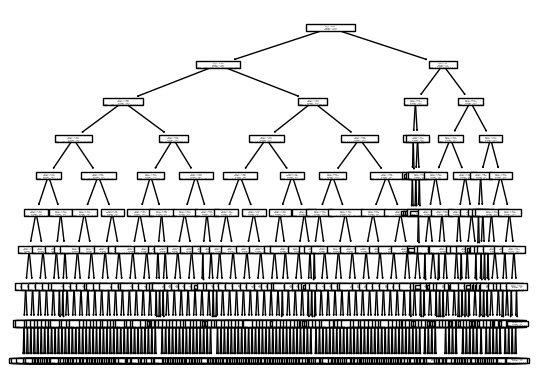

<Figure size 1200x800 with 0 Axes>

In [103]:
tree.plot_tree(Tree_based)
plt.figure(figsize=(12,8))

In [104]:
tree.export_graphviz(Tree_based)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="x[2] <= 0.424\\nentropy = 2.785\\nsamples = 16606\\nvalue = [2031.0, 2493.0, 2331.0, 2589.0, 3228.0, 1923.0, 2011.0]"] ;\n1 [label="x[2] <= -0.469\\nentropy = 2.348\\nsamples = 10147\\nvalue = [2030.0, 2493.0, 1656.0, 50.0, 6.0, 1923.0, 1989.0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="x[2] <= -0.983\\nentropy = 1.735\\nsamples = 5904\\nvalue = [2029.0, 2411.0, 25.0, 0.0, 4.0, 1235.0, 200.0]"] ;\n1 -> 2 ;\n3 [label="x[2] <= -1.322\\nentropy = 1.148\\nsamples = 3455\\nvalue = [2012.0, 1351.0, 3.0, 0.0, 1.0, 72.0, 16.0]"] ;\n2 -> 3 ;\n4 [label="x[1] <= -0.79\\nentropy = 0.782\\nsamples = 1958\\nvalue = [1550, 397, 2, 0, 1, 8, 0]"] ;\n3 -> 4 ;\n5 [label="x[2] <= -1.549\\nentropy = 1.007\\nsamples = 984\\nvalue = [623, 354, 1, 0, 1, 5, 0]"] ;\n4 -> 5 ;\n6 [label="x[2] <= -1.619\\nentropy = 0.627\\nsamples = 634\\nvalue = [551, 76, 1, 0, 1, 5, 0]"] ;\n5 -> 

In [105]:
param_grid = {
    'criterion': ['gini', 'entropy'],  
    'splitter': ['best', 'random'],  
    'max_depth': [9, 10, 8],  
    'min_samples_split': [200, 100, 50], 
    'min_samples_leaf': [100, 200, 300], 
    'max_features': [None, 'sqrt', 'log2']  
}

In [106]:
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [9, 10, 8],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [100, 200, 300],
                         'min_samples_split': [200, 100, 50],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [107]:
# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(x_valid, y_valid)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 100, 'min_samples_split': 200, 'splitter': 'best'}
Best Accuracy: 0.862700263098691
Test Accuracy: 0.8598265895953757


In [108]:
# pip install xgboost


In [109]:
from sklearn.ensemble import GradientBoostingClassifier

In [110]:
gb_clf = GradientBoostingClassifier()

In [111]:
gb_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [112]:
gb_clf.score(x_train,y_train)

0.922016138745032

In [113]:
gb_clf.score(x_valid,y_valid)

0.9022157996146436

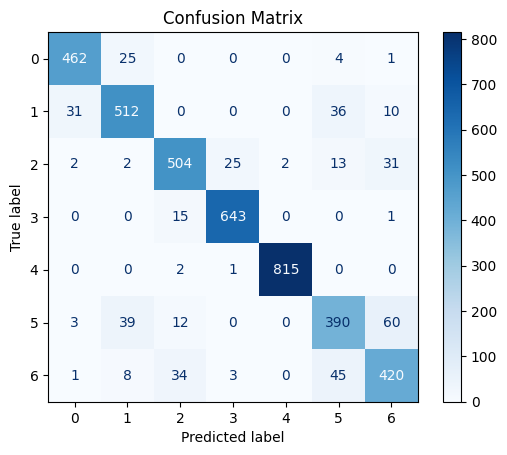

In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate predictions
y_pred = gb_clf.predict(x_valid)

# Compute confusion matrix
cm = confusion_matrix(y_valid, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")  # Use a blue color map for better visibility
plt.title("Confusion Matrix")
plt.show()


In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate predictions
y_pred = gb_clf.predict(x_valid)

# Compute confusion matrix
cm = confusion_matrix(y_valid, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="greens")  # Use a blue color map for better visibility
plt.title("Confusion Matrix")
plt.show()

NameError: name 'gb_clf' is not defined

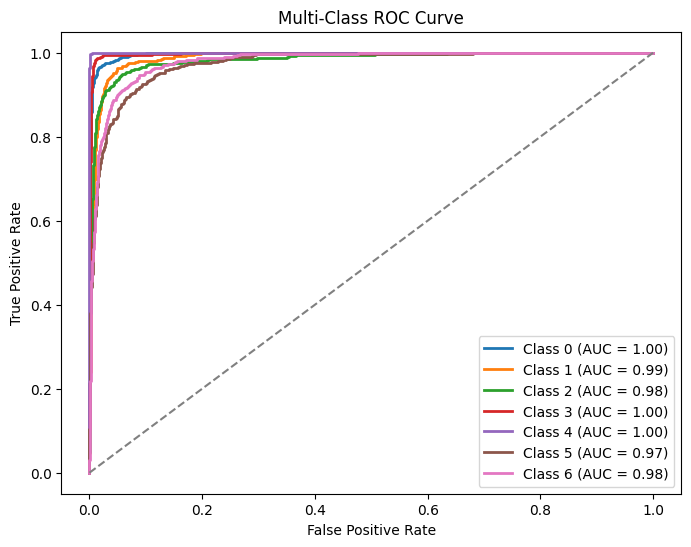

In [115]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for multi-class ROC
n_classes = len(set(y_valid))  # Get the number of unique classes
y_valid_bin = label_binarize(y_valid, classes=range(n_classes))

# Get class probabilities
y_probs = gb_clf.predict_proba(x_valid)  # Predict probability for all classes

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_valid_bin[:, i], y_probs[:, i])  # Compute ROC curve
    roc_auc = auc(fpr, tpr)  # Compute AUC
    plt.plot(fpr, tpr, lw=2, label=f"Class {i} (AUC = {roc_auc:.2f})")

# Plot the diagonal line (random guessing)
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

# Labels and Title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [116]:
y_pred=gb_clf.predict(x_valid)

In [117]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       492
           1       0.87      0.87      0.87       589
           2       0.89      0.87      0.88       579
           3       0.96      0.98      0.97       659
           4       1.00      1.00      1.00       818
           5       0.80      0.77      0.79       504
           6       0.80      0.82      0.81       511

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



In [118]:
from xgboost import XGBClassifier

In [119]:
xgb = XGBClassifier(use_label_encoder=False,eval_metric='mlogloss')

In [120]:
xgb.fit(x_train,y_train)

c:\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning:

[01:07:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [121]:
xgb.score(x_train,y_train)

0.9868119956642177

In [122]:
xgb.score(x_valid,y_valid)

0.9026974951830443